# **1.Data loading and Preprocessing:**

In [ ]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold

# Assuming dataset is located at 'dataset_path'
dataset_path = '/content/drive/MyDrive/rgb_blur'
class_names=['scroll_down', 'scroll_left', 'scroll_right', 'scroll_up', 'zoom_in', 'zoom_out']
# Parameters
num_frames_per_sequence = 10
frame_height = 120
frame_width = 160
color_channels = 3
total_sequences = 3000
train_split = 0.7
val_split = 0.2
test_split = 0.1
k = 5  # Number of folds for cross-validation

# List to store data
data = []

# Get class names from subfolder names
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)

# Load and preprocess data
for class_label, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    sequence_files = sorted(os.listdir(class_path))

    for sequence_file in sequence_files:
        sequence_path = os.path.join(class_path, sequence_file)

        # Select every 4th frame to reduce size
        selected_frames_indices = list(range(0, 40, 4))[:num_frames_per_sequence]

        # Load frames into a 4D numpy array
        sequence_frames = []
        for frame_index in selected_frames_indices:
            frame_file = f'{frame_index}.png'
            frame_path = os.path.join(sequence_path, frame_file)
            if os.path.exists(frame_path):
                img = tf.keras.preprocessing.image.load_img(frame_path, target_size=(frame_height, frame_width))
                img_array = tf.keras.preprocessing.image.img_to_array(img)# This ensures the image is in RGB format
                sequence_frames.append(img_array)
        if len(sequence_frames) == num_frames_per_sequence:
            sequence_frames = np.stack(sequence_frames)
            data.append((sequence_frames, class_label))

# Convert to DataFrame
df = pd.DataFrame(data, columns=['sequence', 'label'])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset into training, validation, and test sets
train_size = int(total_sequences * train_split)
val_size = int(total_sequences * val_split)
test_size = total_sequences - train_size - val_size


# Save the preprocessed data
save_path = '/content/drive/MyDrive/data'
os.makedirs(save_path, exist_ok=True)


df.to_pickle(os.path.join(save_path, 'balanced_data.pkl'))

Streaming output truncated to the last 5000 lines.
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png
8.png
12.png
16.png
20.png
24.png
28.png
32.png
36.png
0.png
4.png

In [ ]:
# @title loading the preprocessed data from drive
# Path to the balanced data file
import os
import numpy as np
import pandas as pd
import tensorflow as tf
balanced_save_path = '/content/drive/MyDrive/data/balanced_data.pkl'
num_frames_per_sequence = 10
frame_height = 120
frame_width = 160
color_channels = 3
total_sequences = 3000
train_split = 0.7
val_split = 0.2
test_split = 0.1
k = 5

# Load the balanced dataset
balanced_data = pd.read_pickle(balanced_save_path)

In [ ]:
# Check the first few entries of the DataFrame

import numpy as np
# Check if 'sequence' and 'label' columns exist
if 'sequence' in balanced_data.columns and 'label' in balanced_data.columns:
    sequence, label = balanced_data.iloc[0]['sequence'], balanced_data.iloc[0]['label']
    print("Sequence shape:", np.array(sequence).shape)
    print("Label:", label)
else:
    print("DataFrame does not have the expected columns.")

Sequence shape: (10, 120, 160, 3)
Label: 0


In [ ]:
print(balanced_data.head())
print(balanced_data.columns)

                                            sequence  label  num_frames
0  [[[[98. 96. 86.], [95. 97. 90.], [100.  98.  9...      0          10
1  [[[[166. 106. 104.], [169. 109. 113.], [159. 1...      0          10
2  [[[[155. 100.  82.], [153.  99. 108.], [148. 1...      0          10
3  [[[[152.  99.  80.], [146. 104.  83.], [157. 1...      0          10
4  [[[[152. 120. 122.], [146. 124. 145.], [138. 1...      0          10
Index(['sequence', 'label', 'num_frames'], dtype='object')


In [ ]:


# Check if 'sequence' and 'label' columns exist
if 'sequence' in balanced_data.columns and 'label' in balanced_data.columns:
    # Group by label and sample 500 sequences from each class
    #balanced_data = full_data.groupby('label').apply(lambda x: x.sample(n=500, random_state=42)).reset_index(drop=True)

    # Verify the new balanced dataset
    sequences_per_gesture = balanced_data['label'].value_counts()
    print("Number of sequences per class (gesture) in balanced dataset:")
    print(sequences_per_gesture)

    # Check the number of frames in each sequence
    balanced_data['num_frames'] = balanced_data['sequence'].apply(lambda x: len(x))

    images_per_sequence = balanced_data.groupby(['label', 'num_frames']).size().reset_index(name='count')
    print("\nNumber of images in each sequence for each class (gesture) in balanced dataset:")
    print(images_per_sequence)
else:
    print("DataFrame does not have the expected columns.")

Number of sequences per class (gesture) in balanced dataset:
label
0    500
1    500
2    500
3    500
4    500
5    500
Name: count, dtype: int64

Number of images in each sequence for each class (gesture) in balanced dataset:
   label  num_frames  count
0      0          10    500
1      1          10    500
2      2          10    500
3      3          10    500
4      4          10    500
5      5          10    500


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to the balanced data file


# Print the shape of the splits
print("Balanced data shape:", balanced_data.shape)
print("balanced data columns:",balanced_data.columns)
# Print the labels in each set
print("\nBalanced set labels:")
print(balanced_data['label'].value_counts().sort_index())

Balanced data shape: (3000, 3)
balanced data columns: Index(['sequence', 'label', 'num_frames'], dtype='object')

Balanced set labels:
label
0    500
1    500
2    500
3    500
4    500
5    500
Name: count, dtype: int64


# **2.Train test split**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to the balanced data file
dataset_path = '/content/drive/MyDrive/rgb_blur'
class_names = sorted(os.listdir(dataset_path))
print(class_names)
balanced_save_path = '/content/drive/MyDrive/data/balanced_data.pkl'

# Load the balanced dataset
balanced_data = pd.read_pickle(balanced_save_path)
# Load the balanced dataset

# Step 1: Split the dataset into 70% training and 30% temporary (validation + test)
train_data, temp_data = train_test_split(balanced_data, train_size=0.7, random_state=42, stratify=balanced_data['label'])

# Step 2: Split the temporary set into 2/3 testing and 1/3 validation
# Since temp_data is 30% of the original, splitting it 2:1 will result in the correct proportions
test_size = 0.6666666666667  # 20/30 = 0.6667
val_data, test_data = train_test_split(temp_data, test_size=test_size, random_state=42, stratify=temp_data['label'])

# Combine all data to shuffle and split manually
combined_data = pd.concat([train_data, val_data, test_data]).sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate counts per label for each split
total_count_per_label = len(combined_data) // len(balanced_data['label'].unique())
train_count_per_label = int(total_count_per_label * 0.7)
val_count_per_label = int(total_count_per_label * 0.2)
test_count_per_label = int(total_count_per_label * 0.1)

train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

# Manually ensure each class has the correct proportion
for label in combined_data['label'].unique():
    label_data = combined_data[combined_data['label'] == label]
    train_data = pd.concat([train_data, label_data.iloc[:train_count_per_label]])
    val_data = pd.concat([val_data, label_data.iloc[train_count_per_label:train_count_per_label + val_count_per_label]])
    test_data = pd.concat([test_data, label_data.iloc[train_count_per_label + val_count_per_label:train_count_per_label + val_count_per_label + test_count_per_label]])

# Shuffle the datasets again
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
val_data = val_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shapes of the splits
print("Training data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Testing data shape:", test_data.shape)

# Print the labels in each set
print("\nTraining set labels:")
print(train_data['label'].value_counts().sort_index())
print("\nValidation set labels:")
print(val_data['label'].value_counts().sort_index())
print("\nTesting set labels:")
print(test_data['label'].value_counts().sort_index())


['scroll_down', 'scroll_left', 'scroll_right', 'scroll_up', 'zoom_in', 'zoom_out']
Training data shape: (2100, 3)
Validation data shape: (600, 3)
Testing data shape: (300, 3)

Training set labels:
label
0    350
1    350
2    350
3    350
4    350
5    350
Name: count, dtype: int64

Validation set labels:
label
0    100
1    100
2    100
3    100
4    100
5    100
Name: count, dtype: int64

Testing set labels:
label
0    50
1    50
2    50
3    50
4    50
5    50
Name: count, dtype: int64


# **3.Feature extraction using inception v3 (CNN)**

In [ ]:
import numpy as np
import pandas as pd
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from tqdm import tqdm

# Function to preprocess and extract features using InceptionV3 for a sequence of images
def extract_features_for_sequence(sequence, model):
    features = []
    for img_array in sequence:
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array)
        features.append(feature.flatten())
    return np.array(features)

# Load the InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(120, 160, 3))
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Function to extract features for an entire dataset
def extract_features(data):
    features = []
    for sequence in tqdm(data['sequence']):
        sequence_features = extract_features_for_sequence(sequence, model)
        features.append(sequence_features)
    return np.array(features)

# Extract features for training, validation, and testing data
X_train_features = extract_features(train_data)
X_val_features = extract_features(val_data)
X_test_features = extract_features(test_data)

train_features_path = "/content/drive/MyDrive/X_train_features.npy"
val_features_path = "/content/drive/MyDrive/X_val_features.npy"
test_features_path = "/content/drive/MyDrive/X_test_features.npy"

np.save(train_features_path, X_train_features)
np.save(val_features_path, X_val_features)
np.save(test_features_path, X_test_features)
# Print the extracted features
print("Extracted Features Shape:")
print("Training set features shape:", X_train_features.shape)
print("Validation set features shape:", X_val_features.shape)
print("Testing set features shape:", X_test_features.shape)


87910968/87910968 [==============================] - 0s 0us/step


  0%|          | 0/2100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 1/2100 [00:02<1:22:09,  2.35s/it]

1/1 [==============================] - 0s 45ms/step


  0%|          | 2/2100 [00:03<54:33,  1.56s/it]  

1/1 [==============================] - 0s 44ms/step


  0%|          | 3/2100 [00:04<45:53,  1.31s/it]

1/1 [==============================] - 0s 42ms/step


  0%|          | 4/2100 [00:05<41:27,  1.19s/it]

1/1 [==============================] - 0s 43ms/step


  0%|          | 5/2100 [00:06<39:00,  1.12s/it]

1/1 [==============================] - 0s 43ms/step


  0%|          | 6/2100 [00:07<37:31,  1.08s/it]

1/1 [==============================] - 0s 42ms/step


  0%|          | 7/2100 [00:08<37:15,  1.07s/it]

1/1 [==============================] - 0s 42ms/step


  0%|          | 8/2100 [00:09<36:27,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


  0%|          | 9/2100 [00:10<36:09,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


  0%|          | 10/2100 [00:11<36:06,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


  1%|          | 11/2100 [00:12<36:10,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


  1%|          | 12/2100 [00:13<36:05,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


  1%|          | 13/2100 [00:14<36:00,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


  1%|          | 14/2100 [00:15<35:48,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 15/2100 [00:16<35:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 16/2100 [00:17<35:38,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 17/2100 [00:18<35:24,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  1%|          | 18/2100 [00:19<35:10,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  1%|          | 19/2100 [00:20<35:05,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 20/2100 [00:21<35:14,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 21/2100 [00:22<35:24,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  1%|          | 22/2100 [00:23<35:06,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 23/2100 [00:24<34:49,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


  1%|          | 24/2100 [00:25<34:37,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


  1%|          | 25/2100 [00:26<34:31,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 26/2100 [00:27<34:29,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


  1%|▏         | 27/2100 [00:28<34:38,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


  1%|▏         | 28/2100 [00:29<34:29,  1.00it/s]

1/1 [==============================] - 0s 45ms/step


  1%|▏         | 29/2100 [00:30<34:53,  1.01s/it]

1/1 [==============================] - 0s 47ms/step


  1%|▏         | 30/2100 [00:31<34:51,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  1%|▏         | 31/2100 [00:32<34:55,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 32/2100 [00:33<34:57,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 33/2100 [00:34<35:00,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 34/2100 [00:35<34:47,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 35/2100 [00:36<35:12,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 36/2100 [00:37<34:54,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 37/2100 [00:38<34:55,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 38/2100 [00:39<34:57,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 39/2100 [00:40<34:35,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 40/2100 [00:41<34:49,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 41/2100 [00:42<34:39,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 42/2100 [00:43<34:22,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 43/2100 [00:44<34:07,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 44/2100 [00:45<34:06,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 45/2100 [00:46<33:58,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 46/2100 [00:47<33:47,  1.01it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 47/2100 [00:48<34:17,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 48/2100 [00:49<34:38,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 49/2100 [00:50<34:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 50/2100 [00:51<34:46,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 51/2100 [00:53<37:33,  1.10s/it]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 52/2100 [00:54<36:31,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 53/2100 [00:55<35:41,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 54/2100 [00:56<35:08,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 55/2100 [00:57<34:43,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 56/2100 [00:58<34:30,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 57/2100 [00:59<34:25,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 58/2100 [01:00<34:19,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 59/2100 [01:01<34:27,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 60/2100 [01:02<34:40,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 61/2100 [01:03<34:35,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 62/2100 [01:04<34:32,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 63/2100 [01:05<34:39,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 64/2100 [01:06<34:53,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 65/2100 [01:07<34:56,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 66/2100 [01:08<34:54,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 67/2100 [01:09<34:47,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 68/2100 [01:10<34:52,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 69/2100 [01:11<34:47,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 70/2100 [01:12<34:47,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 71/2100 [01:13<34:42,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 72/2100 [01:14<34:43,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 73/2100 [01:15<34:35,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 74/2100 [01:16<34:38,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 75/2100 [01:17<34:44,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 76/2100 [01:18<34:51,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 77/2100 [01:19<34:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 78/2100 [01:20<35:06,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 79/2100 [01:21<34:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 80/2100 [01:22<34:25,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 81/2100 [01:23<34:11,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 82/2100 [01:24<34:14,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 83/2100 [01:25<34:20,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 84/2100 [01:26<34:22,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 85/2100 [01:27<34:21,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 86/2100 [01:28<34:25,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 87/2100 [01:29<34:26,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 88/2100 [01:31<34:38,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 89/2100 [01:32<34:37,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 90/2100 [01:33<34:12,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 91/2100 [01:34<33:40,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 92/2100 [01:34<33:26,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 93/2100 [01:35<33:20,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 94/2100 [01:36<33:14,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 95/2100 [01:37<33:02,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 96/2100 [01:38<32:55,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 97/2100 [01:39<32:53,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▍         | 98/2100 [01:40<33:13,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 99/2100 [01:41<33:12,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


  5%|▍         | 100/2100 [01:42<33:32,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 101/2100 [01:43<33:48,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 102/2100 [01:45<34:15,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 103/2100 [01:46<34:24,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 104/2100 [01:47<34:07,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 105/2100 [01:48<33:51,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 106/2100 [01:49<33:30,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 107/2100 [01:50<33:12,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 108/2100 [01:51<33:21,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 109/2100 [01:52<33:38,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 110/2100 [01:53<33:26,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 111/2100 [01:54<33:10,  1.00s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 112/2100 [01:55<33:06,  1.00it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 113/2100 [01:56<33:31,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 114/2100 [01:57<33:43,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 115/2100 [01:58<33:33,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 116/2100 [01:59<33:24,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 117/2100 [02:00<33:23,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 118/2100 [02:01<33:22,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 119/2100 [02:02<33:28,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 120/2100 [02:03<33:39,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 121/2100 [02:04<33:55,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 122/2100 [02:05<33:55,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 123/2100 [02:06<33:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 124/2100 [02:07<33:20,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 125/2100 [02:08<33:20,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 126/2100 [02:09<33:26,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 127/2100 [02:10<33:36,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


  6%|▌         | 128/2100 [02:11<33:17,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 129/2100 [02:12<33:03,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 130/2100 [02:13<32:59,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 131/2100 [02:14<33:35,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 132/2100 [02:15<33:53,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 133/2100 [02:16<33:54,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 134/2100 [02:17<33:34,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 135/2100 [02:18<33:13,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 136/2100 [02:19<33:23,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 137/2100 [02:20<33:25,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 138/2100 [02:21<33:29,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 139/2100 [02:22<33:23,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 140/2100 [02:23<33:20,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 141/2100 [02:24<33:15,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 142/2100 [02:25<33:00,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 143/2100 [02:26<32:49,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 144/2100 [02:27<32:39,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 145/2100 [02:28<32:30,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 146/2100 [02:29<32:18,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 147/2100 [02:30<32:19,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 148/2100 [02:31<32:38,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 149/2100 [02:32<32:52,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 150/2100 [02:33<32:52,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 151/2100 [02:34<32:40,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 152/2100 [02:36<36:13,  1.12s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 153/2100 [02:37<35:29,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 154/2100 [02:38<34:41,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 155/2100 [02:39<34:12,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 156/2100 [02:40<33:47,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 157/2100 [02:41<33:30,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 158/2100 [02:42<33:26,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 159/2100 [02:43<33:45,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 160/2100 [02:44<33:53,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 161/2100 [02:45<33:53,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 162/2100 [02:46<33:59,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 163/2100 [02:47<34:05,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 164/2100 [02:48<34:13,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 165/2100 [02:49<33:58,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 166/2100 [02:50<33:50,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 167/2100 [02:51<33:48,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 168/2100 [02:52<33:54,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 169/2100 [02:53<33:42,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 170/2100 [02:54<33:38,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 171/2100 [02:55<33:16,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 172/2100 [02:56<33:06,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 173/2100 [02:57<33:03,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 174/2100 [02:58<33:15,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 175/2100 [02:59<33:20,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 176/2100 [03:01<33:34,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 177/2100 [03:02<33:28,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 178/2100 [03:03<33:08,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 179/2100 [03:04<32:42,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 180/2100 [03:05<32:40,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 181/2100 [03:06<32:33,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 182/2100 [03:07<32:29,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▊         | 183/2100 [03:08<32:26,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 184/2100 [03:09<32:16,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 185/2100 [03:10<32:06,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 186/2100 [03:11<31:57,  1.00s/it]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 187/2100 [03:12<32:01,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 188/2100 [03:13<32:19,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 189/2100 [03:14<32:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 190/2100 [03:15<32:25,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 191/2100 [03:16<32:13,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 192/2100 [03:17<32:22,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 193/2100 [03:18<32:30,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 194/2100 [03:19<32:42,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 195/2100 [03:20<32:41,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 196/2100 [03:21<32:39,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 197/2100 [03:22<32:32,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 198/2100 [03:23<32:34,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 199/2100 [03:24<32:40,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 200/2100 [03:25<32:52,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 201/2100 [03:26<32:54,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 202/2100 [03:27<33:02,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 10%|▉         | 203/2100 [03:28<32:54,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 204/2100 [03:29<32:49,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 205/2100 [03:30<32:40,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 206/2100 [03:31<32:45,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 207/2100 [03:32<32:45,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 208/2100 [03:33<32:48,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 209/2100 [03:34<32:38,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 210/2100 [03:35<32:32,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 211/2100 [03:36<32:31,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 212/2100 [03:37<32:32,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 213/2100 [03:39<32:42,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 214/2100 [03:40<32:43,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 215/2100 [03:41<32:39,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 216/2100 [03:42<32:32,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 217/2100 [03:43<32:26,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 218/2100 [03:44<32:17,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 219/2100 [03:45<32:08,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 220/2100 [03:46<32:00,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 221/2100 [03:47<32:09,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 222/2100 [03:48<32:12,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 223/2100 [03:49<32:19,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 224/2100 [03:50<32:06,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 225/2100 [03:51<32:02,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 226/2100 [03:52<31:57,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 227/2100 [03:53<32:08,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 228/2100 [03:54<32:14,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 229/2100 [03:55<32:00,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 230/2100 [03:56<32:03,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 231/2100 [03:57<31:48,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 232/2100 [03:58<31:43,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 233/2100 [03:59<31:28,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 234/2100 [04:00<31:18,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 235/2100 [04:01<31:09,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 236/2100 [04:02<31:09,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 237/2100 [04:03<31:05,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 238/2100 [04:04<31:12,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 239/2100 [04:05<31:34,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 240/2100 [04:06<31:26,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 11%|█▏        | 241/2100 [04:07<31:27,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 242/2100 [04:08<31:27,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 243/2100 [04:09<31:21,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 244/2100 [04:10<31:10,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 245/2100 [04:11<31:17,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 246/2100 [04:12<31:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 247/2100 [04:13<31:37,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 248/2100 [04:14<31:30,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 249/2100 [04:15<31:23,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 250/2100 [04:16<31:14,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 251/2100 [04:17<31:08,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 252/2100 [04:19<34:34,  1.12s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 253/2100 [04:20<33:44,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 254/2100 [04:21<33:14,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 255/2100 [04:22<32:41,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 256/2100 [04:23<32:26,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 257/2100 [04:24<32:08,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 258/2100 [04:25<31:53,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 259/2100 [04:26<31:43,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 260/2100 [04:27<31:36,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 261/2100 [04:28<31:34,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 262/2100 [04:29<31:41,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 263/2100 [04:30<31:53,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 264/2100 [04:31<31:54,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 265/2100 [04:32<31:43,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 266/2100 [04:33<31:52,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 267/2100 [04:34<31:49,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 268/2100 [04:35<31:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 269/2100 [04:36<31:58,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 270/2100 [04:37<31:59,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 271/2100 [04:38<31:59,  1.05s/it]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 272/2100 [04:39<31:57,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 273/2100 [04:40<31:59,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 274/2100 [04:42<31:59,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 275/2100 [04:43<31:53,  1.05s/it]

1/1 [==============================] - 0s 49ms/step


 13%|█▎        | 276/2100 [04:44<31:51,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 277/2100 [04:45<31:52,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 278/2100 [04:46<31:59,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 279/2100 [04:47<31:52,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 13%|█▎        | 280/2100 [04:48<31:57,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 281/2100 [04:49<31:54,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 282/2100 [04:50<31:50,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 283/2100 [04:51<31:47,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 284/2100 [04:52<31:53,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 14%|█▎        | 285/2100 [04:53<32:04,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 14%|█▎        | 286/2100 [04:54<31:54,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▎        | 287/2100 [04:55<31:45,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▎        | 288/2100 [04:56<31:29,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 289/2100 [04:57<31:18,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 290/2100 [04:58<31:13,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 291/2100 [04:59<30:55,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 292/2100 [05:00<30:32,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 293/2100 [05:01<30:18,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 294/2100 [05:02<30:16,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 295/2100 [05:03<30:16,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 296/2100 [05:04<30:23,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 297/2100 [05:05<30:27,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 298/2100 [05:06<30:51,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 299/2100 [05:07<31:05,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 300/2100 [05:08<31:09,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 301/2100 [05:10<31:05,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 302/2100 [05:11<30:53,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 14%|█▍        | 303/2100 [05:12<30:39,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 304/2100 [05:13<30:30,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 305/2100 [05:14<30:27,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 306/2100 [05:15<30:21,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 307/2100 [05:16<30:17,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 308/2100 [05:17<30:25,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 309/2100 [05:18<30:12,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 310/2100 [05:19<30:07,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 15%|█▍        | 311/2100 [05:20<30:11,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▍        | 312/2100 [05:21<30:13,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 313/2100 [05:22<29:56,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▍        | 314/2100 [05:23<29:52,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 315/2100 [05:24<29:40,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 316/2100 [05:25<29:32,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


 15%|█▌        | 317/2100 [05:26<29:31,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 318/2100 [05:27<29:25,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 319/2100 [05:28<29:28,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 320/2100 [05:29<29:35,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 321/2100 [05:30<29:39,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 322/2100 [05:31<29:28,  1.01it/s]

1/1 [==============================] - 0s 44ms/step


 15%|█▌        | 323/2100 [05:32<29:29,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 324/2100 [05:33<29:39,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 325/2100 [05:34<29:39,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 326/2100 [05:35<29:48,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 327/2100 [05:36<29:40,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 328/2100 [05:37<29:36,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 329/2100 [05:38<29:36,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 330/2100 [05:39<29:28,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 331/2100 [05:40<29:19,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 332/2100 [05:41<29:15,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 333/2100 [05:42<29:12,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 334/2100 [05:43<29:15,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 335/2100 [05:44<29:31,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 336/2100 [05:45<29:34,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 337/2100 [05:46<29:40,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 338/2100 [05:47<29:45,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 339/2100 [05:48<29:36,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 340/2100 [05:49<29:21,  1.00s/it]

1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 341/2100 [05:50<29:14,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 342/2100 [05:51<29:06,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 343/2100 [05:52<29:11,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 344/2100 [05:53<29:26,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 345/2100 [05:54<29:22,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 346/2100 [05:55<29:23,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 347/2100 [05:56<29:24,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 348/2100 [05:57<29:29,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 349/2100 [05:58<29:21,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 350/2100 [05:59<29:32,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 351/2100 [06:00<33:16,  1.14s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 352/2100 [06:01<32:34,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 353/2100 [06:02<32:07,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 354/2100 [06:03<31:26,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 355/2100 [06:04<30:56,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 356/2100 [06:05<30:36,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 357/2100 [06:06<30:15,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 358/2100 [06:07<30:16,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 359/2100 [06:08<30:10,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 360/2100 [06:09<30:05,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 361/2100 [06:11<30:09,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 362/2100 [06:12<30:59,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 363/2100 [06:13<30:59,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 364/2100 [06:14<30:53,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 365/2100 [06:15<30:39,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 366/2100 [06:16<30:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 367/2100 [06:17<30:23,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 368/2100 [06:18<29:56,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 369/2100 [06:19<29:34,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 370/2100 [06:20<29:22,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 371/2100 [06:21<29:25,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 372/2100 [06:22<29:31,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 373/2100 [06:23<29:51,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 374/2100 [06:24<29:57,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 375/2100 [06:25<30:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 376/2100 [06:26<29:50,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 377/2100 [06:27<29:27,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 378/2100 [06:28<29:07,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 379/2100 [06:29<28:58,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 380/2100 [06:30<28:59,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 381/2100 [06:31<28:57,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 382/2100 [06:32<29:00,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 383/2100 [06:33<29:05,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 384/2100 [06:34<29:08,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 385/2100 [06:35<29:17,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 386/2100 [06:36<29:31,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 387/2100 [06:37<29:31,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 388/2100 [06:38<29:34,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 19%|█▊        | 389/2100 [06:39<29:32,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 390/2100 [06:40<29:22,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 19%|█▊        | 391/2100 [06:41<29:09,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 392/2100 [06:42<29:04,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▊        | 393/2100 [06:44<28:59,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 394/2100 [06:45<28:51,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 395/2100 [06:46<28:46,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 396/2100 [06:47<28:45,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 397/2100 [06:48<28:58,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 398/2100 [06:49<29:12,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 399/2100 [06:50<29:24,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 400/2100 [06:51<29:36,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 401/2100 [06:52<29:31,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 402/2100 [06:53<29:11,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 403/2100 [06:54<28:58,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 404/2100 [06:55<28:48,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 405/2100 [06:56<28:48,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 406/2100 [06:57<28:47,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 407/2100 [06:58<28:41,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 408/2100 [06:59<28:42,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 409/2100 [07:00<28:49,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 20%|█▉        | 410/2100 [07:01<29:07,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 411/2100 [07:02<29:17,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 412/2100 [07:03<29:13,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 413/2100 [07:04<29:03,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 414/2100 [07:05<28:55,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 415/2100 [07:06<28:45,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 416/2100 [07:07<28:36,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 417/2100 [07:08<28:24,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 418/2100 [07:09<28:31,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 20%|█▉        | 419/2100 [07:10<28:26,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 420/2100 [07:11<28:18,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 421/2100 [07:12<28:17,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 422/2100 [07:13<28:33,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 423/2100 [07:14<28:35,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 424/2100 [07:15<28:43,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 425/2100 [07:16<28:48,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 426/2100 [07:17<28:33,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 427/2100 [07:18<28:20,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 428/2100 [07:19<28:19,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 429/2100 [07:20<28:28,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 430/2100 [07:21<28:19,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 431/2100 [07:22<28:17,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 432/2100 [07:23<28:07,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 433/2100 [07:24<27:56,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 434/2100 [07:25<27:48,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 435/2100 [07:26<27:51,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 436/2100 [07:27<28:01,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 437/2100 [07:28<28:17,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 438/2100 [07:29<28:14,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 439/2100 [07:30<28:09,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 440/2100 [07:31<27:59,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 441/2100 [07:32<27:56,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 442/2100 [07:33<27:51,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 443/2100 [07:34<27:50,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 444/2100 [07:35<27:43,  1.00s/it]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 445/2100 [07:36<27:40,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 446/2100 [07:37<27:38,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 447/2100 [07:39<27:50,  1.01s/it]

1/1 [==============================] - 0s 52ms/step


 21%|██▏       | 448/2100 [07:40<28:12,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 449/2100 [07:41<28:11,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 21%|██▏       | 450/2100 [07:42<28:11,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 21%|██▏       | 451/2100 [07:43<28:05,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 452/2100 [07:44<31:02,  1.13s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 453/2100 [07:45<30:32,  1.11s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 454/2100 [07:46<30:00,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 455/2100 [07:47<29:37,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 456/2100 [07:48<29:28,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 457/2100 [07:49<29:19,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 458/2100 [07:50<29:02,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 459/2100 [07:51<29:07,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 460/2100 [07:53<29:17,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 461/2100 [07:54<29:13,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 462/2100 [07:55<28:57,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 463/2100 [07:56<28:39,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 464/2100 [07:57<28:28,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 465/2100 [07:58<28:17,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 466/2100 [07:59<28:17,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 467/2100 [08:00<28:21,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 468/2100 [08:01<28:05,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 469/2100 [08:02<28:07,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 470/2100 [08:03<28:03,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 471/2100 [08:04<27:59,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 472/2100 [08:05<28:08,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 473/2100 [08:06<28:03,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 474/2100 [08:07<28:00,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 475/2100 [08:08<28:05,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 476/2100 [08:09<28:00,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 477/2100 [08:10<27:54,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 478/2100 [08:11<27:51,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 479/2100 [08:12<27:42,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 480/2100 [08:13<27:38,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 481/2100 [08:14<27:35,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 482/2100 [08:15<27:30,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 483/2100 [08:16<27:32,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 484/2100 [08:17<27:40,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 485/2100 [08:18<27:48,  1.03s/it]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 486/2100 [08:19<27:59,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 487/2100 [08:20<28:15,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 23%|██▎       | 488/2100 [08:21<27:57,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 489/2100 [08:23<27:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 490/2100 [08:24<27:40,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 491/2100 [08:25<27:28,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 492/2100 [08:26<27:22,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 493/2100 [08:27<27:16,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 494/2100 [08:28<27:12,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 495/2100 [08:29<27:19,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 496/2100 [08:30<27:28,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 497/2100 [08:31<27:32,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 498/2100 [08:32<27:38,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 499/2100 [08:33<27:41,  1.04s/it]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 500/2100 [08:34<27:31,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 501/2100 [08:35<27:19,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 502/2100 [08:36<27:05,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 503/2100 [08:37<26:56,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 504/2100 [08:38<26:58,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 505/2100 [08:39<26:54,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 506/2100 [08:40<26:46,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 507/2100 [08:41<26:36,  1.00s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 508/2100 [08:42<26:52,  1.01s/it]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 509/2100 [08:43<27:05,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 510/2100 [08:44<27:14,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 511/2100 [08:45<27:15,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 512/2100 [08:46<27:03,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 513/2100 [08:47<26:51,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 514/2100 [08:48<26:38,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 515/2100 [08:49<26:35,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 516/2100 [08:50<26:30,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 517/2100 [08:51<26:25,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 518/2100 [08:52<26:21,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 519/2100 [08:53<26:17,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 520/2100 [08:54<26:17,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 521/2100 [08:55<26:28,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 522/2100 [08:56<26:46,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▍       | 523/2100 [08:57<26:53,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 25%|██▍       | 524/2100 [08:58<27:02,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 525/2100 [08:59<27:04,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 526/2100 [09:00<26:52,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 527/2100 [09:01<26:37,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 528/2100 [09:02<26:28,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 529/2100 [09:03<26:20,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 530/2100 [09:04<26:18,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 531/2100 [09:05<26:17,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 532/2100 [09:06<26:12,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 533/2100 [09:07<26:16,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 534/2100 [09:08<26:29,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 535/2100 [09:09<26:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 536/2100 [09:10<26:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 537/2100 [09:11<26:32,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 538/2100 [09:12<26:30,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 539/2100 [09:13<26:23,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 540/2100 [09:14<26:25,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 541/2100 [09:15<26:23,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 542/2100 [09:16<26:29,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 543/2100 [09:17<26:37,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 544/2100 [09:18<26:27,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 545/2100 [09:19<26:27,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 546/2100 [09:20<26:44,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 547/2100 [09:22<26:45,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 548/2100 [09:23<26:50,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 549/2100 [09:24<26:42,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 550/2100 [09:25<26:27,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 551/2100 [09:26<26:22,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 26%|██▋       | 552/2100 [09:27<26:18,  1.02s/it]

1/1 [==============================] - 0s 48ms/step


 26%|██▋       | 553/2100 [09:28<29:57,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 26%|██▋       | 554/2100 [09:29<29:30,  1.15s/it]

1/1 [==============================] - 0s 46ms/step


 26%|██▋       | 555/2100 [09:30<29:04,  1.13s/it]

1/1 [==============================] - 0s 45ms/step


 26%|██▋       | 556/2100 [09:31<28:38,  1.11s/it]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 557/2100 [09:32<28:39,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 558/2100 [09:34<28:30,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 559/2100 [09:35<28:27,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 560/2100 [09:36<28:18,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 561/2100 [09:37<28:13,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 562/2100 [09:38<27:54,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 563/2100 [09:39<27:40,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 564/2100 [09:40<27:30,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 565/2100 [09:41<27:13,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 566/2100 [09:42<27:06,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 567/2100 [09:43<27:00,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 568/2100 [09:44<26:48,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 569/2100 [09:45<26:58,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 570/2100 [09:46<26:59,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 571/2100 [09:47<26:51,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 572/2100 [09:48<26:40,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 27%|██▋       | 573/2100 [09:49<26:35,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 574/2100 [09:51<26:39,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 575/2100 [09:52<26:24,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 576/2100 [09:53<26:14,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 577/2100 [09:54<26:03,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 578/2100 [09:55<25:58,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 579/2100 [09:56<25:53,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 580/2100 [09:57<25:49,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 581/2100 [09:58<25:47,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 582/2100 [09:59<25:44,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 583/2100 [10:00<25:48,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 584/2100 [10:01<25:44,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 585/2100 [10:02<25:37,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 586/2100 [10:03<25:37,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 587/2100 [10:04<25:28,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 588/2100 [10:05<25:29,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 589/2100 [10:06<25:26,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 590/2100 [10:07<25:27,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 591/2100 [10:08<25:28,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 592/2100 [10:09<25:24,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 593/2100 [10:10<25:20,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 594/2100 [10:11<25:28,  1.02s/it]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 595/2100 [10:12<25:46,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 596/2100 [10:13<26:03,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 597/2100 [10:14<26:07,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 598/2100 [10:15<26:05,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 599/2100 [10:16<25:58,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 29%|██▊       | 600/2100 [10:17<26:05,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 601/2100 [10:18<26:03,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▊       | 602/2100 [10:19<25:58,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 603/2100 [10:20<25:55,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 604/2100 [10:21<25:54,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 605/2100 [10:22<25:46,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 606/2100 [10:23<25:48,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 607/2100 [10:24<25:54,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 608/2100 [10:25<25:55,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 609/2100 [10:26<25:34,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 610/2100 [10:27<25:17,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 611/2100 [10:28<25:12,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 612/2100 [10:29<25:11,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 613/2100 [10:30<25:09,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 614/2100 [10:31<25:01,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 615/2100 [10:32<24:57,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 616/2100 [10:33<24:51,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 617/2100 [10:34<24:42,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 618/2100 [10:35<24:37,  1.00it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 619/2100 [10:36<24:49,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 30%|██▉       | 620/2100 [10:38<25:04,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 621/2100 [10:39<25:07,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 622/2100 [10:40<25:05,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 623/2100 [10:41<25:10,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 624/2100 [10:42<25:14,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 625/2100 [10:43<25:15,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 30%|██▉       | 626/2100 [10:44<25:09,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 627/2100 [10:45<25:05,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 628/2100 [10:46<24:52,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 629/2100 [10:47<24:42,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 630/2100 [10:48<24:40,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 631/2100 [10:49<24:35,  1.00s/it]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 632/2100 [10:50<24:41,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 633/2100 [10:51<25:05,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 634/2100 [10:52<25:19,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 635/2100 [10:53<25:18,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 636/2100 [10:54<25:08,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 637/2100 [10:55<25:02,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 638/2100 [10:56<24:56,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 639/2100 [10:57<24:52,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 640/2100 [10:58<24:42,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 641/2100 [10:59<24:34,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 642/2100 [11:00<24:32,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 643/2100 [11:01<24:33,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 31%|███       | 644/2100 [11:02<24:43,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 31%|███       | 645/2100 [11:03<24:57,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 646/2100 [11:04<24:56,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 647/2100 [11:05<24:50,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 648/2100 [11:06<24:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 649/2100 [11:07<24:36,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 650/2100 [11:08<24:32,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 651/2100 [11:09<24:26,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 652/2100 [11:10<24:22,  1.01s/it]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 653/2100 [11:12<27:48,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 654/2100 [11:13<27:24,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 655/2100 [11:14<27:06,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 656/2100 [11:15<27:06,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 31%|███▏      | 657/2100 [11:16<27:05,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 658/2100 [11:17<26:47,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 659/2100 [11:18<26:35,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 31%|███▏      | 660/2100 [11:19<26:27,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 31%|███▏      | 661/2100 [11:20<26:12,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 662/2100 [11:21<25:58,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 663/2100 [11:23<25:53,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 664/2100 [11:24<25:35,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 665/2100 [11:25<25:25,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 666/2100 [11:26<25:13,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 667/2100 [11:27<25:08,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 668/2100 [11:28<25:19,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 669/2100 [11:29<25:29,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 670/2100 [11:30<25:35,  1.07s/it]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 671/2100 [11:31<25:49,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 672/2100 [11:32<25:32,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 673/2100 [11:33<25:21,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 674/2100 [11:34<25:10,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 675/2100 [11:35<25:05,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 676/2100 [11:36<24:54,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 677/2100 [11:37<24:46,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 678/2100 [11:38<24:47,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 679/2100 [11:39<24:47,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 680/2100 [11:41<24:58,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 681/2100 [11:42<25:04,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 682/2100 [11:43<25:06,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 683/2100 [11:44<25:13,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 684/2100 [11:45<24:55,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 685/2100 [11:46<24:41,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 686/2100 [11:47<24:33,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 687/2100 [11:48<24:25,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 688/2100 [11:49<24:11,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 689/2100 [11:50<24:11,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 690/2100 [11:51<24:06,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 691/2100 [11:52<24:06,  1.03s/it]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 692/2100 [11:53<24:23,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 693/2100 [11:54<24:37,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 694/2100 [11:55<24:32,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 695/2100 [11:56<24:24,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 696/2100 [11:57<24:24,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 697/2100 [11:58<24:20,  1.04s/it]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 698/2100 [11:59<24:19,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 699/2100 [12:00<24:09,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 33%|███▎      | 700/2100 [12:01<24:07,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 701/2100 [12:02<24:06,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 702/2100 [12:03<23:59,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 703/2100 [12:04<23:57,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 704/2100 [12:05<24:14,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▎      | 705/2100 [12:07<24:25,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▎      | 706/2100 [12:08<24:22,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▎      | 707/2100 [12:09<24:15,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 708/2100 [12:10<24:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 709/2100 [12:11<24:00,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 710/2100 [12:12<23:55,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 711/2100 [12:13<23:48,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 712/2100 [12:14<23:43,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 713/2100 [12:15<23:41,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 714/2100 [12:16<23:38,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 715/2100 [12:17<23:41,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 716/2100 [12:18<23:40,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 717/2100 [12:19<23:48,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 718/2100 [12:20<23:57,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 719/2100 [12:21<23:52,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 720/2100 [12:22<23:51,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 721/2100 [12:23<23:39,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 722/2100 [12:24<23:36,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 723/2100 [12:25<23:28,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 724/2100 [12:26<23:21,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 725/2100 [12:27<23:15,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 726/2100 [12:28<23:16,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 727/2100 [12:29<23:08,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 728/2100 [12:30<23:03,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 729/2100 [12:31<23:16,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▍      | 730/2100 [12:32<23:33,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 731/2100 [12:33<23:33,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 732/2100 [12:34<23:29,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 733/2100 [12:35<23:20,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 734/2100 [12:36<23:18,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 735/2100 [12:37<23:18,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 736/2100 [12:38<23:11,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 737/2100 [12:39<23:07,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 738/2100 [12:40<23:02,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 739/2100 [12:41<22:58,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 740/2100 [12:42<22:55,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 741/2100 [12:43<23:06,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 742/2100 [12:44<23:07,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 743/2100 [12:45<23:17,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 744/2100 [12:47<23:15,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 745/2100 [12:48<23:06,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 746/2100 [12:49<23:02,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 747/2100 [12:50<22:58,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 748/2100 [12:51<22:57,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 749/2100 [12:52<22:47,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 750/2100 [12:53<22:45,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 751/2100 [12:54<22:40,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 752/2100 [12:55<22:33,  1.00s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 753/2100 [12:56<26:05,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 754/2100 [12:57<26:05,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 755/2100 [12:58<25:57,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 756/2100 [13:00<25:48,  1.15s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 757/2100 [13:01<25:29,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 758/2100 [13:02<25:10,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 759/2100 [13:03<25:02,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 760/2100 [13:04<24:53,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 761/2100 [13:05<24:42,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 762/2100 [13:06<24:32,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▋      | 763/2100 [13:07<24:29,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 36%|███▋      | 764/2100 [13:08<24:17,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 765/2100 [13:09<24:07,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 36%|███▋      | 766/2100 [13:10<24:07,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 767/2100 [13:12<24:00,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 768/2100 [13:13<23:51,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 769/2100 [13:14<23:47,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 770/2100 [13:15<23:34,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 771/2100 [13:16<23:37,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 772/2100 [13:17<23:40,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 773/2100 [13:18<23:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 774/2100 [13:19<23:27,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 775/2100 [13:20<23:24,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 776/2100 [13:21<23:22,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 777/2100 [13:22<23:28,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 778/2100 [13:23<23:33,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 779/2100 [13:24<23:25,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 780/2100 [13:25<23:22,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 781/2100 [13:26<23:10,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 782/2100 [13:27<23:12,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 783/2100 [13:28<23:09,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 784/2100 [13:30<23:04,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 785/2100 [13:31<22:55,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 786/2100 [13:32<22:50,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 787/2100 [13:33<22:48,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 788/2100 [13:34<22:47,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 789/2100 [13:35<22:57,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 790/2100 [13:36<23:13,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 791/2100 [13:37<23:18,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 792/2100 [13:38<23:13,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 793/2100 [13:39<23:13,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 794/2100 [13:40<23:07,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 795/2100 [13:41<22:51,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 796/2100 [13:42<22:36,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 797/2100 [13:43<22:31,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 798/2100 [13:44<22:30,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 799/2100 [13:45<22:25,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 800/2100 [13:46<22:27,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 801/2100 [13:47<22:36,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 802/2100 [13:48<22:52,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 803/2100 [13:49<22:45,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 804/2100 [13:51<22:42,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 805/2100 [13:52<22:51,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 806/2100 [13:53<22:46,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 807/2100 [13:54<22:49,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 808/2100 [13:55<22:48,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 809/2100 [13:56<22:37,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 810/2100 [13:57<22:24,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 811/2100 [13:58<22:24,  1.04s/it]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 812/2100 [13:59<22:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▊      | 813/2100 [14:00<22:21,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 814/2100 [14:01<22:22,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 815/2100 [14:02<22:16,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 816/2100 [14:03<22:16,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 817/2100 [14:04<22:18,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 818/2100 [14:05<22:08,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 819/2100 [14:06<21:59,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 820/2100 [14:07<21:52,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 821/2100 [14:08<21:51,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 822/2100 [14:09<21:45,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 823/2100 [14:10<21:43,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 824/2100 [14:11<21:52,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 825/2100 [14:12<22:10,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 826/2100 [14:13<22:22,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 827/2100 [14:15<22:26,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 828/2100 [14:16<22:13,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 829/2100 [14:17<22:11,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 40%|███▉      | 830/2100 [14:18<22:03,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 831/2100 [14:19<21:48,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 832/2100 [14:20<21:50,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 833/2100 [14:21<21:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 834/2100 [14:22<21:42,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 835/2100 [14:23<21:38,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 836/2100 [14:24<21:33,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 837/2100 [14:25<21:38,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 838/2100 [14:26<21:48,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 839/2100 [14:27<21:55,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 840/2100 [14:28<21:56,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 841/2100 [14:29<22:05,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 842/2100 [14:30<22:08,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 843/2100 [14:31<22:05,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 844/2100 [14:32<22:00,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 845/2100 [14:33<21:49,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 846/2100 [14:34<21:41,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 847/2100 [14:35<21:39,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 848/2100 [14:36<21:41,  1.04s/it]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 849/2100 [14:38<25:12,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 850/2100 [14:39<24:59,  1.20s/it]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 851/2100 [14:40<24:34,  1.18s/it]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 852/2100 [14:41<24:16,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 853/2100 [14:42<23:55,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 854/2100 [14:44<23:36,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 855/2100 [14:45<23:16,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 856/2100 [14:46<23:04,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 857/2100 [14:47<22:48,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 858/2100 [14:48<22:38,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 859/2100 [14:49<22:28,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 860/2100 [14:50<22:24,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 861/2100 [14:51<22:26,  1.09s/it]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 862/2100 [14:52<22:42,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 41%|████      | 863/2100 [14:53<22:38,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 864/2100 [14:54<22:27,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 865/2100 [14:56<22:18,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 866/2100 [14:57<22:08,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 867/2100 [14:58<21:53,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████▏     | 868/2100 [14:59<21:48,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 869/2100 [15:00<21:38,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 41%|████▏     | 870/2100 [15:01<21:33,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 871/2100 [15:02<21:41,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 872/2100 [15:03<21:51,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 873/2100 [15:04<21:50,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 874/2100 [15:05<21:55,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 875/2100 [15:06<21:45,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 876/2100 [15:07<21:49,  1.07s/it]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 877/2100 [15:08<21:38,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 878/2100 [15:09<21:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 879/2100 [15:10<21:22,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 880/2100 [15:11<21:21,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 881/2100 [15:12<21:17,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 882/2100 [15:13<21:12,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 883/2100 [15:14<21:05,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 884/2100 [15:16<21:05,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 885/2100 [15:17<21:06,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 886/2100 [15:18<21:10,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 887/2100 [15:19<21:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 888/2100 [15:20<20:57,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 889/2100 [15:21<20:53,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 890/2100 [15:22<20:51,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 891/2100 [15:23<20:53,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 892/2100 [15:24<20:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 893/2100 [15:25<20:48,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 894/2100 [15:26<20:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 895/2100 [15:27<20:44,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 896/2100 [15:28<20:51,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 897/2100 [15:29<20:54,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 898/2100 [15:30<21:00,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 899/2100 [15:31<20:57,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 900/2100 [15:32<21:05,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 901/2100 [15:33<20:47,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 902/2100 [15:34<20:42,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 903/2100 [15:35<20:34,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 904/2100 [15:36<20:23,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 905/2100 [15:37<20:21,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 906/2100 [15:38<20:22,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 907/2100 [15:39<20:18,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 908/2100 [15:40<20:08,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 909/2100 [15:41<20:14,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 910/2100 [15:42<20:24,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 911/2100 [15:43<20:32,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 912/2100 [15:44<20:28,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 913/2100 [15:45<20:17,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 44%|████▎     | 914/2100 [15:46<20:04,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 915/2100 [15:47<20:03,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 916/2100 [15:49<20:10,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 917/2100 [15:50<20:08,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 918/2100 [15:51<19:54,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 919/2100 [15:52<20:02,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 920/2100 [15:53<20:04,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 921/2100 [15:54<20:06,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 922/2100 [15:55<20:14,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 923/2100 [15:56<20:19,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 924/2100 [15:57<20:21,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 925/2100 [15:58<20:28,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 926/2100 [15:59<20:12,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 927/2100 [16:00<20:00,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 928/2100 [16:01<19:51,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 929/2100 [16:02<19:41,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 930/2100 [16:03<19:38,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 931/2100 [16:04<19:37,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 932/2100 [16:05<19:36,  1.01s/it]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 933/2100 [16:06<19:37,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 934/2100 [16:07<19:54,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 45%|████▍     | 935/2100 [16:08<20:01,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 936/2100 [16:09<19:56,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 937/2100 [16:10<19:52,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 938/2100 [16:11<19:40,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 939/2100 [16:12<19:34,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 940/2100 [16:13<19:25,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 941/2100 [16:14<19:18,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 942/2100 [16:15<19:12,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 943/2100 [16:16<19:11,  1.00it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 944/2100 [16:17<19:20,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 945/2100 [16:18<19:17,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 946/2100 [16:19<19:26,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 947/2100 [16:20<19:25,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 948/2100 [16:21<19:42,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 949/2100 [16:22<19:47,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 950/2100 [16:23<19:41,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 951/2100 [16:24<19:23,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 952/2100 [16:25<19:15,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 953/2100 [16:26<19:03,  1.00it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 954/2100 [16:27<18:59,  1.01it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▌     | 955/2100 [16:28<18:56,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 956/2100 [16:29<18:53,  1.01it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 957/2100 [16:30<18:54,  1.01it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 958/2100 [16:31<18:50,  1.01it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 959/2100 [16:32<18:53,  1.01it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 960/2100 [16:34<22:50,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 961/2100 [16:35<22:32,  1.19s/it]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 962/2100 [16:36<22:08,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 963/2100 [16:37<21:49,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 964/2100 [16:38<21:33,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 965/2100 [16:39<21:17,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 966/2100 [16:40<21:06,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 967/2100 [16:41<20:54,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 968/2100 [16:43<20:44,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 46%|████▌     | 969/2100 [16:44<20:43,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 970/2100 [16:45<20:42,  1.10s/it]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 971/2100 [16:46<20:43,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 972/2100 [16:47<20:51,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 973/2100 [16:48<20:47,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 974/2100 [16:49<20:40,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 975/2100 [16:50<20:34,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 46%|████▋     | 976/2100 [16:51<20:22,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 977/2100 [16:52<20:18,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 978/2100 [16:53<20:08,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 979/2100 [16:55<20:07,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 980/2100 [16:56<20:21,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 981/2100 [16:57<20:14,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 982/2100 [16:58<20:11,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 983/2100 [16:59<20:02,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 984/2100 [17:00<20:05,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 985/2100 [17:01<19:56,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 986/2100 [17:02<19:43,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 987/2100 [17:03<19:32,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 988/2100 [17:04<19:27,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 989/2100 [17:05<19:21,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 990/2100 [17:06<19:18,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 991/2100 [17:07<19:10,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 992/2100 [17:08<19:05,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 993/2100 [17:09<18:58,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 994/2100 [17:10<19:01,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 47%|████▋     | 995/2100 [17:11<19:02,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 996/2100 [17:12<19:08,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 997/2100 [17:13<19:14,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 998/2100 [17:15<19:06,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 999/2100 [17:16<19:07,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1000/2100 [17:17<19:08,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1001/2100 [17:18<19:12,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1002/2100 [17:19<19:06,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1003/2100 [17:20<19:01,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1004/2100 [17:21<18:56,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1005/2100 [17:22<18:49,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1006/2100 [17:23<18:54,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1007/2100 [17:24<18:51,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1008/2100 [17:25<18:49,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1009/2100 [17:26<18:46,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1010/2100 [17:27<18:48,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 1011/2100 [17:28<18:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1012/2100 [17:29<18:34,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1013/2100 [17:30<18:35,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1014/2100 [17:31<18:29,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1015/2100 [17:32<18:35,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 1016/2100 [17:33<18:35,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 1017/2100 [17:34<18:34,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 1018/2100 [17:35<18:41,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 49%|████▊     | 1019/2100 [17:36<18:56,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 1020/2100 [17:37<19:03,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 1021/2100 [17:38<19:01,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 1022/2100 [17:39<19:00,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▊     | 1023/2100 [17:40<18:49,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 1024/2100 [17:42<18:45,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 1025/2100 [17:43<18:37,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 1026/2100 [17:44<18:30,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 1027/2100 [17:45<18:26,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1028/2100 [17:46<18:22,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1029/2100 [17:47<18:18,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 1030/2100 [17:48<18:21,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 1031/2100 [17:49<18:29,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1032/2100 [17:50<18:35,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1033/2100 [17:51<18:34,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 1034/2100 [17:52<18:36,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1035/2100 [17:53<18:26,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1036/2100 [17:54<18:21,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 1037/2100 [17:55<18:13,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 1038/2100 [17:56<18:07,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 49%|████▉     | 1039/2100 [17:57<18:03,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 1040/2100 [17:58<17:57,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 1041/2100 [17:59<17:48,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 1042/2100 [18:00<17:46,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 1043/2100 [18:01<17:46,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 1044/2100 [18:02<17:47,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 1045/2100 [18:03<17:58,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 1046/2100 [18:04<18:05,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 1047/2100 [18:05<17:57,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 1048/2100 [18:06<17:55,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 1049/2100 [18:07<17:51,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 1050/2100 [18:08<17:52,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 1051/2100 [18:09<17:49,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 1052/2100 [18:10<17:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 1053/2100 [18:11<17:48,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 1054/2100 [18:12<17:45,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 1055/2100 [18:13<17:38,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 1056/2100 [18:14<17:34,  1.01s/it]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 1057/2100 [18:16<20:51,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 1058/2100 [18:17<20:36,  1.19s/it]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 1059/2100 [18:18<20:20,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 50%|█████     | 1060/2100 [18:19<20:13,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 1061/2100 [18:20<19:55,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1062/2100 [18:22<19:40,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1063/2100 [18:23<19:36,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1064/2100 [18:24<19:26,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1065/2100 [18:25<19:15,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 1066/2100 [18:26<19:16,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1067/2100 [18:27<19:13,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1068/2100 [18:28<19:03,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 1069/2100 [18:29<18:57,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 1070/2100 [18:30<18:45,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 1071/2100 [18:31<18:37,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 1072/2100 [18:33<18:32,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1073/2100 [18:34<18:23,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 1074/2100 [18:35<18:27,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 1075/2100 [18:36<18:21,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 1076/2100 [18:37<18:20,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 51%|█████▏    | 1077/2100 [18:38<18:18,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 1078/2100 [18:39<18:24,  1.08s/it]

1/1 [==============================] - 0s 49ms/step


 51%|█████▏    | 1079/2100 [18:40<18:26,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 51%|█████▏    | 1080/2100 [18:41<18:35,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 1081/2100 [18:42<18:32,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 1082/2100 [18:43<18:29,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 1083/2100 [18:44<18:21,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 1084/2100 [18:45<18:07,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 1085/2100 [18:47<18:00,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 1086/2100 [18:48<17:57,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1087/2100 [18:49<17:57,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1088/2100 [18:50<17:52,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1089/2100 [18:51<17:50,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 1090/2100 [18:52<17:51,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1091/2100 [18:53<17:55,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1092/2100 [18:54<17:58,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1093/2100 [18:55<18:00,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 1094/2100 [18:56<18:00,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 1095/2100 [18:57<17:51,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 1096/2100 [18:58<17:50,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1097/2100 [18:59<17:39,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1098/2100 [19:00<17:34,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1099/2100 [19:01<17:33,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 1100/2100 [19:02<17:30,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 1101/2100 [19:03<17:32,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 1102/2100 [19:05<17:37,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1103/2100 [19:06<17:46,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1104/2100 [19:07<17:40,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1105/2100 [19:08<17:50,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1106/2100 [19:09<17:44,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 1107/2100 [19:10<17:39,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1108/2100 [19:11<17:36,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1109/2100 [19:12<17:31,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1110/2100 [19:13<17:26,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 1111/2100 [19:14<17:21,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1112/2100 [19:15<17:17,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1113/2100 [19:16<17:16,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1114/2100 [19:17<17:24,  1.06s/it]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 1115/2100 [19:18<17:28,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1116/2100 [19:19<17:33,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1117/2100 [19:20<17:22,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 1118/2100 [19:22<17:20,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 1119/2100 [19:23<17:16,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1120/2100 [19:24<17:05,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1121/2100 [19:25<16:58,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 1122/2100 [19:26<16:52,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 1123/2100 [19:27<17:00,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 1124/2100 [19:28<16:59,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 1125/2100 [19:29<16:57,  1.04s/it]

1/1 [==============================] - 0s 51ms/step


 54%|█████▎    | 1126/2100 [19:30<17:05,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 1127/2100 [19:31<17:20,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 1128/2100 [19:32<17:15,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1129/2100 [19:33<17:16,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1130/2100 [19:34<17:07,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1131/2100 [19:35<17:07,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1132/2100 [19:36<17:03,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1133/2100 [19:37<16:57,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1134/2100 [19:38<16:55,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1135/2100 [19:39<16:48,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1136/2100 [19:40<16:46,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1137/2100 [19:41<16:40,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 1138/2100 [19:43<16:39,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1139/2100 [19:44<16:45,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 54%|█████▍    | 1140/2100 [19:45<16:48,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1141/2100 [19:46<16:53,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1142/2100 [19:47<16:54,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 1143/2100 [19:48<16:51,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 1144/2100 [19:49<16:48,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 1145/2100 [19:50<16:44,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 1146/2100 [19:51<16:41,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 1147/2100 [19:52<16:35,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 1148/2100 [19:53<16:29,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 1149/2100 [19:54<16:26,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 1150/2100 [19:55<16:31,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 1151/2100 [19:56<16:30,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 1152/2100 [19:57<16:35,  1.05s/it]

1/1 [==============================] - 0s 50ms/step


 55%|█████▍    | 1153/2100 [19:59<19:01,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 1154/2100 [20:00<18:41,  1.19s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1155/2100 [20:01<18:26,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1156/2100 [20:02<18:09,  1.15s/it]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 1157/2100 [20:03<17:58,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 55%|█████▌    | 1158/2100 [20:04<17:47,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1159/2100 [20:06<17:37,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 1160/2100 [20:07<17:37,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 55%|█████▌    | 1161/2100 [20:08<17:37,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1162/2100 [20:09<17:35,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 1163/2100 [20:10<17:33,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 1164/2100 [20:11<17:29,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 1165/2100 [20:12<17:20,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1166/2100 [20:13<17:17,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1167/2100 [20:14<17:08,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 1168/2100 [20:15<17:01,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1169/2100 [20:17<17:00,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1170/2100 [20:18<17:01,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1171/2100 [20:19<16:52,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1172/2100 [20:20<16:49,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1173/2100 [20:21<16:53,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 1174/2100 [20:22<16:55,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 1175/2100 [20:23<16:54,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1176/2100 [20:24<16:51,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1177/2100 [20:25<16:38,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1178/2100 [20:26<16:30,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1179/2100 [20:27<16:21,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 1180/2100 [20:28<16:16,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 1181/2100 [20:29<16:13,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 1182/2100 [20:31<16:07,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 1183/2100 [20:32<16:03,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 1184/2100 [20:33<16:06,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 56%|█████▋    | 1185/2100 [20:34<16:16,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 1186/2100 [20:35<16:17,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1187/2100 [20:36<16:12,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1188/2100 [20:37<16:07,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1189/2100 [20:38<16:02,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1190/2100 [20:39<15:56,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1191/2100 [20:40<15:51,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1192/2100 [20:41<15:51,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1193/2100 [20:42<15:45,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1194/2100 [20:43<15:42,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1195/2100 [20:44<15:42,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1196/2100 [20:45<15:44,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 1197/2100 [20:46<15:51,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 1198/2100 [20:47<15:55,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1199/2100 [20:48<15:56,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1200/2100 [20:50<15:51,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 1201/2100 [20:51<15:40,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 1202/2100 [20:52<15:33,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 1203/2100 [20:53<15:31,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1204/2100 [20:54<15:28,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1205/2100 [20:55<15:28,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1206/2100 [20:56<15:22,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 1207/2100 [20:57<15:22,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1208/2100 [20:58<15:22,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1209/2100 [20:59<15:31,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 1210/2100 [21:00<15:38,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1211/2100 [21:01<15:35,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1212/2100 [21:02<15:32,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1213/2100 [21:03<15:25,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1214/2100 [21:04<15:22,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1215/2100 [21:05<15:16,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1216/2100 [21:06<15:11,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1217/2100 [21:07<15:05,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1218/2100 [21:08<15:06,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 1219/2100 [21:09<15:04,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1220/2100 [21:10<15:02,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 1221/2100 [21:11<15:02,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1222/2100 [21:12<15:07,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1223/2100 [21:13<15:11,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1224/2100 [21:14<15:06,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1225/2100 [21:15<15:05,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 1226/2100 [21:16<15:03,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1227/2100 [21:17<15:02,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 1228/2100 [21:18<14:58,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▊    | 1229/2100 [21:19<14:52,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 1230/2100 [21:20<14:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 1231/2100 [21:22<14:42,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 1232/2100 [21:23<14:47,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 59%|█████▊    | 1233/2100 [21:24<14:54,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1234/2100 [21:25<15:01,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1235/2100 [21:26<14:59,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1236/2100 [21:27<14:52,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1237/2100 [21:28<14:43,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1238/2100 [21:29<14:43,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1239/2100 [21:30<14:38,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1240/2100 [21:31<14:38,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1241/2100 [21:32<14:39,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1242/2100 [21:33<14:36,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1243/2100 [21:34<14:36,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1244/2100 [21:35<14:30,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1245/2100 [21:36<14:26,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 1246/2100 [21:37<14:39,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 1247/2100 [21:38<14:42,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 1248/2100 [21:39<14:35,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 1249/2100 [21:40<14:35,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 1250/2100 [21:41<14:32,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 1251/2100 [21:42<14:28,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 1252/2100 [21:43<14:27,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 1253/2100 [21:44<14:22,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 1254/2100 [21:45<14:12,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 1255/2100 [21:46<14:09,  1.00s/it]

1/1 [==============================] - 0s 41ms/step


 60%|█████▉    | 1256/2100 [21:47<14:04,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 1257/2100 [21:48<14:04,  1.00s/it]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 1258/2100 [21:49<14:13,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 60%|█████▉    | 1259/2100 [21:50<14:22,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 1260/2100 [21:51<14:22,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 1261/2100 [21:52<14:19,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 1262/2100 [21:53<14:15,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 1263/2100 [21:54<14:10,  1.02s/it]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1264/2100 [21:56<16:10,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1265/2100 [21:57<16:03,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1266/2100 [21:58<15:57,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 1267/2100 [21:59<15:52,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 60%|██████    | 1268/2100 [22:00<15:50,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 60%|██████    | 1269/2100 [22:01<15:51,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 1270/2100 [22:03<15:55,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 1271/2100 [22:04<15:58,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 1272/2100 [22:05<15:48,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 1273/2100 [22:06<15:40,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1274/2100 [22:07<15:30,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1275/2100 [22:08<15:23,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1276/2100 [22:09<15:11,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1277/2100 [22:10<15:15,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1278/2100 [22:11<15:07,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1279/2100 [22:13<15:01,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1280/2100 [22:14<14:56,  1.09s/it]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 1281/2100 [22:15<14:57,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 1282/2100 [22:16<15:03,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 61%|██████    | 1283/2100 [22:17<15:02,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 1284/2100 [22:18<14:57,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1285/2100 [22:19<14:49,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 1286/2100 [22:20<15:00,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 61%|██████▏   | 1287/2100 [22:21<14:45,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 61%|██████▏   | 1288/2100 [22:22<14:35,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 61%|██████▏   | 1289/2100 [22:23<14:28,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 61%|██████▏   | 1290/2100 [22:24<14:25,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 61%|██████▏   | 1291/2100 [22:26<14:24,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1292/2100 [22:27<14:27,  1.07s/it]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 1293/2100 [22:28<14:29,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1294/2100 [22:29<14:33,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1295/2100 [22:30<14:34,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 1296/2100 [22:31<14:29,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 1297/2100 [22:32<14:17,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 1298/2100 [22:33<14:09,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1299/2100 [22:34<14:04,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1300/2100 [22:35<13:59,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1301/2100 [22:36<13:57,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1302/2100 [22:37<13:55,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1303/2100 [22:38<13:56,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 1304/2100 [22:39<13:59,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1305/2100 [22:40<14:00,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1306/2100 [22:41<14:00,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1307/2100 [22:43<13:57,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 1308/2100 [22:44<13:59,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1309/2100 [22:45<13:53,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1310/2100 [22:46<13:48,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1311/2100 [22:47<13:44,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 1312/2100 [22:48<13:44,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1313/2100 [22:49<13:40,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1314/2100 [22:50<13:36,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1315/2100 [22:51<13:34,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 1316/2100 [22:52<13:38,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1317/2100 [22:53<13:39,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1318/2100 [22:54<13:47,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1319/2100 [22:55<13:41,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1320/2100 [22:56<13:40,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1321/2100 [22:57<13:33,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1322/2100 [22:58<13:32,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1323/2100 [22:59<13:29,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1324/2100 [23:00<13:24,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 63%|██████▎   | 1325/2100 [23:01<13:21,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1326/2100 [23:02<13:21,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 1327/2100 [23:03<13:17,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1328/2100 [23:04<13:17,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1329/2100 [23:05<13:21,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1330/2100 [23:07<13:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1331/2100 [23:08<13:30,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 1332/2100 [23:09<13:22,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 1333/2100 [23:10<13:16,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 1334/2100 [23:11<13:14,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 1335/2100 [23:12<13:11,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 1336/2100 [23:13<13:10,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 1337/2100 [23:14<13:08,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 1338/2100 [23:15<13:03,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1339/2100 [23:16<12:55,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1340/2100 [23:17<12:57,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1341/2100 [23:18<13:05,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1342/2100 [23:19<13:09,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1343/2100 [23:20<13:11,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1344/2100 [23:21<13:11,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1345/2100 [23:22<13:04,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1346/2100 [23:23<12:56,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1347/2100 [23:24<12:49,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 1348/2100 [23:25<12:49,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 1349/2100 [23:26<12:46,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 1350/2100 [23:27<12:42,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1351/2100 [23:28<12:38,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 1352/2100 [23:29<12:38,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 1353/2100 [23:30<12:34,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 1354/2100 [23:31<12:42,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1355/2100 [23:32<12:45,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1356/2100 [23:33<12:40,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 1357/2100 [23:34<12:36,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 1358/2100 [23:35<12:29,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 65%|██████▍   | 1359/2100 [23:36<12:25,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 1360/2100 [23:37<12:33,  1.02s/it]

1/1 [==============================] - 0s 48ms/step


 65%|██████▍   | 1361/2100 [23:39<14:26,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 65%|██████▍   | 1362/2100 [23:40<14:18,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 1363/2100 [23:41<14:11,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 1364/2100 [23:42<14:08,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 1365/2100 [23:43<14:07,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 1366/2100 [23:45<14:08,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 1367/2100 [23:46<14:10,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 1368/2100 [23:47<14:03,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 1369/2100 [23:48<13:53,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 65%|██████▌   | 1370/2100 [23:49<13:48,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 1371/2100 [23:50<13:43,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 1372/2100 [23:51<13:37,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 65%|██████▌   | 1373/2100 [23:52<13:33,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 1374/2100 [23:54<13:27,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 1375/2100 [23:55<13:24,  1.11s/it]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 1376/2100 [23:56<13:31,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 1377/2100 [23:57<13:30,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 1378/2100 [23:58<13:28,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 1379/2100 [23:59<13:24,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 1380/2100 [24:00<13:17,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 1381/2100 [24:01<13:11,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1382/2100 [24:02<13:05,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1383/2100 [24:03<13:02,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1384/2100 [24:05<12:59,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 1385/2100 [24:06<13:00,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1386/2100 [24:07<13:03,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 1387/2100 [24:08<13:04,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 1388/2100 [24:09<13:03,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1389/2100 [24:10<13:04,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1390/2100 [24:11<13:02,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 1391/2100 [24:12<12:59,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 66%|██████▋   | 1392/2100 [24:13<12:50,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 66%|██████▋   | 1393/2100 [24:14<12:45,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 1394/2100 [24:15<12:44,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▋   | 1395/2100 [24:17<12:43,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 66%|██████▋   | 1396/2100 [24:18<12:42,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 1397/2100 [24:19<12:40,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1398/2100 [24:20<12:36,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 1399/2100 [24:21<12:39,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1400/2100 [24:22<12:49,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1401/2100 [24:23<12:48,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1402/2100 [24:24<12:45,  1.10s/it]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 1403/2100 [24:25<12:41,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 1404/2100 [24:26<12:37,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1405/2100 [24:27<12:34,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 1406/2100 [24:29<12:29,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1407/2100 [24:30<12:25,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1408/2100 [24:31<12:20,  1.07s/it]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 1409/2100 [24:32<12:15,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 1410/2100 [24:33<12:12,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1411/2100 [24:34<12:16,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1412/2100 [24:35<12:17,  1.07s/it]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 1413/2100 [24:36<12:18,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 1414/2100 [24:37<12:16,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1415/2100 [24:38<12:06,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1416/2100 [24:39<12:00,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 1417/2100 [24:40<11:53,  1.05s/it]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 1418/2100 [24:41<11:51,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1419/2100 [24:42<11:54,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 1420/2100 [24:43<11:58,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1421/2100 [24:44<12:00,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1422/2100 [24:45<11:56,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 1423/2100 [24:47<11:56,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1424/2100 [24:48<12:01,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1425/2100 [24:49<11:55,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1426/2100 [24:50<11:51,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1427/2100 [24:51<11:47,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1428/2100 [24:52<11:47,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1429/2100 [24:53<11:47,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1430/2100 [24:54<11:51,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1431/2100 [24:55<11:47,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 1432/2100 [24:56<11:42,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 1433/2100 [24:57<11:42,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 1434/2100 [24:58<11:40,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 1435/2100 [24:59<11:41,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 1436/2100 [25:00<11:46,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 1437/2100 [25:01<11:48,  1.07s/it]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 1438/2100 [25:02<11:44,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1439/2100 [25:03<11:37,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 69%|██████▊   | 1440/2100 [25:04<11:28,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1441/2100 [25:05<11:23,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 69%|██████▊   | 1442/2100 [25:07<11:21,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 1443/2100 [25:08<11:25,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1444/2100 [25:09<11:25,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1445/2100 [25:10<11:25,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1446/2100 [25:11<11:21,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 1447/2100 [25:12<11:23,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1448/2100 [25:13<11:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 1449/2100 [25:14<11:27,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1450/2100 [25:15<11:22,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 1451/2100 [25:16<11:15,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 1452/2100 [25:17<11:12,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 1453/2100 [25:18<11:05,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 1454/2100 [25:19<10:59,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 1455/2100 [25:20<10:53,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 1456/2100 [25:21<10:49,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 1457/2100 [25:22<10:50,  1.01s/it]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 1458/2100 [25:24<12:36,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 1459/2100 [25:25<12:30,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 1460/2100 [25:26<12:29,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 1461/2100 [25:27<12:26,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 70%|██████▉   | 1462/2100 [25:28<12:20,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 1463/2100 [25:29<12:10,  1.15s/it]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 1464/2100 [25:30<12:02,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 1465/2100 [25:32<11:55,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 1466/2100 [25:33<11:53,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 1467/2100 [25:34<11:51,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 1468/2100 [25:35<11:48,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 1469/2100 [25:36<11:41,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 1470/2100 [25:37<11:45,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 70%|███████   | 1471/2100 [25:38<11:55,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 1472/2100 [25:39<11:51,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 1473/2100 [25:41<11:45,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 1474/2100 [25:42<11:38,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 1475/2100 [25:43<11:32,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 1476/2100 [25:44<11:29,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 1477/2100 [25:45<11:23,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 1478/2100 [25:46<11:18,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 1479/2100 [25:47<11:14,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 1480/2100 [25:48<11:09,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 1481/2100 [25:49<11:08,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1482/2100 [25:50<11:08,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1483/2100 [25:51<11:05,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1484/2100 [25:52<11:00,  1.07s/it]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 1485/2100 [25:54<11:09,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1486/2100 [25:55<11:03,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1487/2100 [25:56<10:55,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 1488/2100 [25:57<10:48,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1489/2100 [25:58<10:44,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 1490/2100 [25:59<10:45,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 1491/2100 [26:00<10:42,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1492/2100 [26:01<10:39,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 1493/2100 [26:02<10:43,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 1494/2100 [26:03<10:50,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1495/2100 [26:04<10:51,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 1496/2100 [26:05<10:49,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 1497/2100 [26:06<10:44,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 1498/2100 [26:07<10:40,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 1499/2100 [26:08<10:37,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 1500/2100 [26:09<10:34,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 1501/2100 [26:10<10:27,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 1502/2100 [26:11<10:26,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1503/2100 [26:13<10:25,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1504/2100 [26:14<10:25,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 1505/2100 [26:15<10:27,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 1506/2100 [26:16<10:33,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1507/2100 [26:17<10:35,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1508/2100 [26:18<10:32,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1509/2100 [26:19<10:26,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1510/2100 [26:20<10:23,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1511/2100 [26:21<10:17,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1512/2100 [26:22<10:14,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1513/2100 [26:23<10:13,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1514/2100 [26:24<10:10,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1515/2100 [26:25<10:06,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1516/2100 [26:26<10:04,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 1517/2100 [26:27<10:02,  1.03s/it]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 1518/2100 [26:28<10:08,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1519/2100 [26:29<10:12,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 1520/2100 [26:30<10:12,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 1521/2100 [26:31<10:08,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 1522/2100 [26:32<10:03,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1523/2100 [26:34<09:58,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1524/2100 [26:35<09:56,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 1525/2100 [26:36<09:50,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 1526/2100 [26:37<09:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1527/2100 [26:38<09:44,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1528/2100 [26:39<09:41,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 1529/2100 [26:40<09:41,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1530/2100 [26:41<09:44,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1531/2100 [26:42<09:45,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 1532/2100 [26:43<09:45,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1533/2100 [26:44<09:47,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1534/2100 [26:45<09:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1535/2100 [26:46<09:41,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 1536/2100 [26:47<09:37,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1537/2100 [26:48<09:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1538/2100 [26:49<09:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 1539/2100 [26:50<09:29,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 1540/2100 [26:51<09:26,  1.01s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 1541/2100 [26:52<09:29,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 1542/2100 [26:53<09:35,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 1543/2100 [26:54<09:38,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 1544/2100 [26:55<09:38,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▎  | 1545/2100 [26:56<09:38,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 1546/2100 [26:57<09:34,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 1547/2100 [26:58<09:28,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 1548/2100 [26:59<09:26,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 1549/2100 [27:00<09:20,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 1550/2100 [27:01<09:20,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 1551/2100 [27:02<09:18,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1552/2100 [27:03<09:14,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 1553/2100 [27:04<09:12,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 1554/2100 [27:05<09:10,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1555/2100 [27:06<09:09,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 1556/2100 [27:07<09:10,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1557/2100 [27:08<09:10,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 1558/2100 [27:09<09:08,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1559/2100 [27:10<09:06,  1.01s/it]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 1560/2100 [27:11<09:06,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 1561/2100 [27:12<09:04,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 1562/2100 [27:13<09:03,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 1563/2100 [27:14<09:05,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 1564/2100 [27:15<09:05,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 75%|███████▍  | 1565/2100 [27:16<09:02,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 75%|███████▍  | 1566/2100 [27:17<09:05,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 75%|███████▍  | 1567/2100 [27:18<09:05,  1.02s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 1568/2100 [27:20<10:39,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 75%|███████▍  | 1569/2100 [27:21<10:28,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 1570/2100 [27:22<10:21,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▍  | 1571/2100 [27:23<10:14,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 1572/2100 [27:25<10:07,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 75%|███████▍  | 1573/2100 [27:26<10:02,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 75%|███████▍  | 1574/2100 [27:27<09:57,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 75%|███████▌  | 1575/2100 [27:28<09:54,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 75%|███████▌  | 1576/2100 [27:29<09:53,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 1577/2100 [27:30<09:49,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 1578/2100 [27:31<09:53,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 1579/2100 [27:33<09:52,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 1580/2100 [27:34<09:52,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 1581/2100 [27:35<09:51,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 1582/2100 [27:36<09:46,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 75%|███████▌  | 1583/2100 [27:37<09:41,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 75%|███████▌  | 1584/2100 [27:38<09:38,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 1585/2100 [27:39<09:33,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 1586/2100 [27:40<09:30,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 1587/2100 [27:41<09:26,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 1588/2100 [27:43<09:21,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 1589/2100 [27:44<09:18,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 76%|███████▌  | 1590/2100 [27:45<09:17,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 1591/2100 [27:46<09:23,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 1592/2100 [27:47<09:20,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 1593/2100 [27:48<09:15,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 1594/2100 [27:49<09:08,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 1595/2100 [27:50<09:01,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 1596/2100 [27:51<08:57,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 1597/2100 [27:52<08:54,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 1598/2100 [27:53<08:51,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 1599/2100 [27:54<08:49,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 1600/2100 [27:55<08:45,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 1601/2100 [27:56<08:45,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 1602/2100 [27:57<08:47,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▋  | 1603/2100 [27:59<08:50,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 1604/2100 [28:00<08:47,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▋  | 1605/2100 [28:01<08:47,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 76%|███████▋  | 1606/2100 [28:02<08:45,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1607/2100 [28:03<08:43,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1608/2100 [28:04<08:42,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 1609/2100 [28:05<08:41,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1610/2100 [28:06<08:38,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1611/2100 [28:07<08:39,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1612/2100 [28:08<08:35,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 1613/2100 [28:09<08:33,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 1614/2100 [28:10<08:36,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 1615/2100 [28:11<08:37,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1616/2100 [28:12<08:39,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1617/2100 [28:13<08:34,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1618/2100 [28:14<08:28,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1619/2100 [28:16<08:26,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1620/2100 [28:17<08:24,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1621/2100 [28:18<08:25,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1622/2100 [28:19<08:19,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1623/2100 [28:20<08:15,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1624/2100 [28:21<08:13,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 1625/2100 [28:22<08:12,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 1626/2100 [28:23<08:18,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 1627/2100 [28:24<08:17,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 1628/2100 [28:25<08:17,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1629/2100 [28:26<08:16,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 1630/2100 [28:27<08:12,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1631/2100 [28:28<08:09,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 1632/2100 [28:29<08:08,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1633/2100 [28:30<08:05,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1634/2100 [28:31<08:03,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1635/2100 [28:32<08:02,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1636/2100 [28:33<07:59,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 1637/2100 [28:34<07:58,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 1638/2100 [28:35<08:01,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 1639/2100 [28:36<08:02,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1640/2100 [28:37<08:01,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 1641/2100 [28:38<07:59,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1642/2100 [28:39<07:53,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 1643/2100 [28:41<07:52,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1644/2100 [28:42<07:51,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1645/2100 [28:43<07:47,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 1646/2100 [28:44<07:44,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 1647/2100 [28:45<07:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 1648/2100 [28:46<07:40,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▊  | 1649/2100 [28:47<07:43,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▊  | 1650/2100 [28:48<07:42,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 79%|███████▊  | 1651/2100 [28:49<07:46,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▊  | 1652/2100 [28:50<07:47,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▊  | 1653/2100 [28:51<07:46,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 1654/2100 [28:52<07:41,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 1655/2100 [28:53<07:39,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 1656/2100 [28:54<07:37,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 1657/2100 [28:55<07:34,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 1658/2100 [28:56<07:32,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 1659/2100 [28:57<07:29,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 1660/2100 [28:58<07:26,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 1661/2100 [28:59<07:24,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 1662/2100 [29:00<07:27,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 1663/2100 [29:01<07:33,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 1664/2100 [29:02<07:35,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 1665/2100 [29:03<07:37,  1.05s/it]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 1666/2100 [29:05<08:54,  1.23s/it]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 1667/2100 [29:06<08:42,  1.21s/it]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 1668/2100 [29:07<08:32,  1.19s/it]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 1669/2100 [29:08<08:24,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 1670/2100 [29:09<08:17,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 1671/2100 [29:11<08:12,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 80%|███████▉  | 1672/2100 [29:12<08:07,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 1673/2100 [29:13<08:07,  1.14s/it]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 1674/2100 [29:14<08:11,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 1675/2100 [29:15<08:10,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 1676/2100 [29:16<08:08,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 1677/2100 [29:17<08:04,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 1678/2100 [29:19<08:00,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 80%|███████▉  | 1679/2100 [29:20<07:54,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 1680/2100 [29:21<07:49,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 1681/2100 [29:22<07:46,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 1682/2100 [29:23<07:44,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 1683/2100 [29:24<07:42,  1.11s/it]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 1684/2100 [29:25<07:44,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 1685/2100 [29:26<07:45,  1.12s/it]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 1686/2100 [29:27<07:48,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 1687/2100 [29:29<07:53,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 1688/2100 [29:30<07:46,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 1689/2100 [29:31<07:38,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 1690/2100 [29:32<07:34,  1.11s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 1691/2100 [29:33<07:28,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 1692/2100 [29:34<07:25,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 1693/2100 [29:35<07:23,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 1694/2100 [29:36<07:21,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 1695/2100 [29:37<07:21,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 81%|████████  | 1696/2100 [29:38<07:21,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 1697/2100 [29:40<07:23,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 1698/2100 [29:41<07:19,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 1699/2100 [29:42<07:20,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 1700/2100 [29:43<07:15,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 1701/2100 [29:44<07:10,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 1702/2100 [29:45<07:07,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 1703/2100 [29:46<07:04,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 1704/2100 [29:47<07:00,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 1705/2100 [29:48<06:58,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 1706/2100 [29:49<06:56,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 1707/2100 [29:50<06:55,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 81%|████████▏ | 1708/2100 [29:51<06:56,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 81%|████████▏ | 1709/2100 [29:52<07:01,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 1710/2100 [29:53<07:02,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 81%|████████▏ | 1711/2100 [29:55<07:01,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1712/2100 [29:56<06:58,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1713/2100 [29:57<06:55,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 1714/2100 [29:58<06:53,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1715/2100 [29:59<06:50,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1716/2100 [30:00<06:47,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1717/2100 [30:01<06:43,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 1718/2100 [30:02<06:43,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1719/2100 [30:03<06:42,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 1720/2100 [30:04<06:41,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 1721/2100 [30:05<06:44,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1722/2100 [30:06<06:45,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 1723/2100 [30:07<06:48,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1724/2100 [30:08<06:45,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 1725/2100 [30:09<06:40,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1726/2100 [30:11<06:37,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1727/2100 [30:12<06:32,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 1728/2100 [30:13<06:31,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 1729/2100 [30:14<06:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1730/2100 [30:15<06:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 1731/2100 [30:16<06:26,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 1732/2100 [30:17<06:27,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 1733/2100 [30:18<06:28,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1734/2100 [30:19<06:28,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1735/2100 [30:20<06:25,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1736/2100 [30:21<06:22,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 83%|████████▎ | 1737/2100 [30:22<06:20,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1738/2100 [30:23<06:16,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1739/2100 [30:24<06:11,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1740/2100 [30:25<06:08,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1741/2100 [30:26<06:06,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 1742/2100 [30:27<06:03,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1743/2100 [30:28<06:08,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1744/2100 [30:29<06:09,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 83%|████████▎ | 1745/2100 [30:30<06:11,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1746/2100 [30:31<06:11,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1747/2100 [30:32<06:08,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 1748/2100 [30:33<06:05,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1749/2100 [30:34<06:03,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 1750/2100 [30:35<06:00,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1751/2100 [30:36<05:58,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 1752/2100 [30:38<05:58,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 1753/2100 [30:39<05:57,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 1754/2100 [30:40<05:54,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 84%|████████▎ | 1755/2100 [30:41<05:53,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 1756/2100 [30:42<05:52,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 84%|████████▎ | 1757/2100 [30:43<05:53,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 1758/2100 [30:44<05:52,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1759/2100 [30:45<05:51,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1760/2100 [30:46<05:48,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 1761/2100 [30:47<05:44,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 1762/2100 [30:48<05:42,  1.01s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 1763/2100 [30:49<06:34,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 1764/2100 [30:50<06:32,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 1765/2100 [30:52<06:28,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 1766/2100 [30:53<06:26,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 1767/2100 [30:54<06:24,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 1768/2100 [30:55<06:25,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 1769/2100 [30:56<06:25,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 1770/2100 [30:57<06:24,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 1771/2100 [30:59<06:19,  1.15s/it]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 1772/2100 [31:00<06:14,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 1773/2100 [31:01<06:12,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 1774/2100 [31:02<06:09,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 1775/2100 [31:03<06:07,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 1776/2100 [31:04<06:05,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 1777/2100 [31:05<06:03,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 1778/2100 [31:06<06:06,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 85%|████████▍ | 1779/2100 [31:08<06:09,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 1780/2100 [31:09<06:07,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 1781/2100 [31:10<06:05,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 1782/2100 [31:11<06:03,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▍ | 1783/2100 [31:12<05:58,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 1784/2100 [31:13<05:56,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 1785/2100 [31:14<05:53,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 1786/2100 [31:15<05:51,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 1787/2100 [31:17<05:50,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 1788/2100 [31:18<05:48,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 1789/2100 [31:19<05:47,  1.12s/it]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 1790/2100 [31:20<05:43,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 1791/2100 [31:21<05:43,  1.11s/it]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 1792/2100 [31:22<05:44,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 1793/2100 [31:23<05:42,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 85%|████████▌ | 1794/2100 [31:24<05:38,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 1795/2100 [31:25<05:34,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1796/2100 [31:26<05:30,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 1797/2100 [31:28<05:30,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 1798/2100 [31:29<05:29,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 1799/2100 [31:30<05:26,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 1800/2100 [31:31<05:25,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1801/2100 [31:32<05:25,  1.09s/it]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 1802/2100 [31:33<05:25,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1803/2100 [31:34<05:26,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1804/2100 [31:35<05:26,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 1805/2100 [31:36<05:22,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 1806/2100 [31:37<05:21,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 1807/2100 [31:39<05:19,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 1808/2100 [31:40<05:16,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1809/2100 [31:41<05:16,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 1810/2100 [31:42<05:15,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 1811/2100 [31:43<05:13,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 1812/2100 [31:44<05:10,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 1813/2100 [31:45<05:13,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 1814/2100 [31:46<05:12,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 1815/2100 [31:47<05:11,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 86%|████████▋ | 1816/2100 [31:48<05:08,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 1817/2100 [31:49<05:07,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1818/2100 [31:50<05:03,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1819/2100 [31:51<04:58,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 1820/2100 [31:53<04:59,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1821/2100 [31:54<04:57,  1.07s/it]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 1822/2100 [31:55<04:53,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1823/2100 [31:56<04:50,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1824/2100 [31:57<04:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1825/2100 [31:58<04:47,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1826/2100 [31:59<04:52,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1827/2100 [32:00<04:56,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1828/2100 [32:01<04:51,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 1829/2100 [32:02<04:48,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 1830/2100 [32:03<04:46,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1831/2100 [32:04<04:45,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1832/2100 [32:05<04:43,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1833/2100 [32:06<04:43,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 1834/2100 [32:07<04:41,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 1835/2100 [32:08<04:40,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 1836/2100 [32:09<04:40,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 1837/2100 [32:11<04:40,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1838/2100 [32:12<04:38,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1839/2100 [32:13<04:36,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1840/2100 [32:14<04:33,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1841/2100 [32:15<04:31,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 1842/2100 [32:16<04:27,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1843/2100 [32:17<04:25,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1844/2100 [32:18<04:26,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1845/2100 [32:19<04:27,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1846/2100 [32:20<04:27,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1847/2100 [32:21<04:25,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1848/2100 [32:22<04:23,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1849/2100 [32:23<04:22,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 1850/2100 [32:24<04:24,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 1851/2100 [32:25<04:26,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1852/2100 [32:26<04:24,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1853/2100 [32:27<04:21,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1854/2100 [32:28<04:19,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1855/2100 [32:29<04:17,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1856/2100 [32:31<04:15,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 1857/2100 [32:32<04:14,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 1858/2100 [32:33<04:13,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▊ | 1859/2100 [32:34<04:49,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 1860/2100 [32:35<04:45,  1.19s/it]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 1861/2100 [32:37<04:43,  1.19s/it]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 1862/2100 [32:38<04:46,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 89%|████████▊ | 1863/2100 [32:39<04:42,  1.19s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1864/2100 [32:40<04:38,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1865/2100 [32:41<04:33,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 1866/2100 [32:42<04:29,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1867/2100 [32:43<04:27,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1868/2100 [32:45<04:25,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 1869/2100 [32:46<04:22,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1870/2100 [32:47<04:19,  1.13s/it]

1/1 [==============================] - 0s 57ms/step


 89%|████████▉ | 1871/2100 [32:48<04:21,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 1872/2100 [32:49<04:21,  1.15s/it]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 1873/2100 [32:50<04:21,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 1874/2100 [32:51<04:19,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 89%|████████▉ | 1875/2100 [32:53<04:17,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 1876/2100 [32:54<04:15,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 1877/2100 [32:55<04:11,  1.13s/it]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 1878/2100 [32:56<04:08,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 1879/2100 [32:57<04:05,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 1880/2100 [32:58<04:02,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 1881/2100 [32:59<03:59,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 1882/2100 [33:00<03:59,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 1883/2100 [33:01<03:58,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 1884/2100 [33:02<03:58,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 1885/2100 [33:04<03:57,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 1886/2100 [33:05<03:55,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 1887/2100 [33:06<03:51,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 1888/2100 [33:07<03:49,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 1889/2100 [33:08<03:48,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 1890/2100 [33:09<03:46,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 1891/2100 [33:10<03:47,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1892/2100 [33:11<03:44,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1893/2100 [33:12<03:43,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1894/2100 [33:13<03:41,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1895/2100 [33:14<03:41,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1896/2100 [33:15<03:41,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 1897/2100 [33:17<03:39,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1898/2100 [33:18<03:38,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 1899/2100 [33:19<03:36,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 1900/2100 [33:20<03:34,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 1901/2100 [33:21<03:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1902/2100 [33:22<03:30,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 1903/2100 [33:23<03:29,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 1904/2100 [33:24<03:26,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1905/2100 [33:25<03:25,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 1906/2100 [33:26<03:24,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 1907/2100 [33:27<03:24,  1.06s/it]

1/1 [==============================] - 0s 50ms/step


 91%|█████████ | 1908/2100 [33:28<03:25,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 1909/2100 [33:29<03:23,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1910/2100 [33:30<03:19,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1911/2100 [33:31<03:16,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1912/2100 [33:32<03:15,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 1913/2100 [33:33<03:15,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1914/2100 [33:34<03:14,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 1915/2100 [33:35<03:13,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 1916/2100 [33:37<03:11,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 1917/2100 [33:38<03:10,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 1918/2100 [33:39<03:11,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 1919/2100 [33:40<03:10,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 1920/2100 [33:41<03:11,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 91%|█████████▏| 1921/2100 [33:42<03:10,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1922/2100 [33:43<03:08,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 1923/2100 [33:44<03:06,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1924/2100 [33:45<03:04,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1925/2100 [33:46<03:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1926/2100 [33:47<03:00,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1927/2100 [33:48<02:59,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1928/2100 [33:49<02:57,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 1929/2100 [33:50<02:56,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1930/2100 [33:51<02:56,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 1931/2100 [33:52<02:56,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 1932/2100 [33:53<02:55,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 1933/2100 [33:54<02:54,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 1934/2100 [33:55<02:53,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1935/2100 [33:56<02:50,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1936/2100 [33:57<02:49,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1937/2100 [33:58<02:48,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1938/2100 [33:59<02:46,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1939/2100 [34:00<02:44,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 1940/2100 [34:01<02:43,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 1941/2100 [34:02<02:41,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 1942/2100 [34:03<02:40,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1943/2100 [34:05<02:42,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1944/2100 [34:06<02:42,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1945/2100 [34:07<02:41,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1946/2100 [34:08<02:40,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1947/2100 [34:09<02:37,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1948/2100 [34:10<02:35,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1949/2100 [34:11<02:34,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1950/2100 [34:12<02:32,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1951/2100 [34:13<02:31,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1952/2100 [34:14<02:30,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1953/2100 [34:15<02:28,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1954/2100 [34:16<02:27,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1955/2100 [34:17<02:28,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 1956/2100 [34:18<02:29,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 1957/2100 [34:19<02:29,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1958/2100 [34:20<02:28,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1959/2100 [34:21<02:26,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1960/2100 [34:22<02:23,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1961/2100 [34:23<02:22,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 1962/2100 [34:24<02:20,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 1963/2100 [34:25<02:18,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 1964/2100 [34:26<02:17,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 1965/2100 [34:27<02:15,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 1966/2100 [34:28<02:15,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 1967/2100 [34:29<02:15,  1.02s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▎| 1968/2100 [34:30<02:16,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 1969/2100 [34:31<02:16,  1.04s/it]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 1970/2100 [34:33<02:35,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 1971/2100 [34:34<02:33,  1.19s/it]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 1972/2100 [34:35<02:30,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 1973/2100 [34:36<02:28,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 1974/2100 [34:37<02:26,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 1975/2100 [34:39<02:24,  1.16s/it]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 1976/2100 [34:40<02:22,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 1977/2100 [34:41<02:21,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 1978/2100 [34:42<02:20,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 1979/2100 [34:43<02:18,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 1980/2100 [34:44<02:18,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 1981/2100 [34:45<02:17,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 1982/2100 [34:47<02:14,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 1983/2100 [34:48<02:12,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 1984/2100 [34:49<02:11,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 1985/2100 [34:50<02:09,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 1986/2100 [34:51<02:08,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 1987/2100 [34:52<02:06,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 1988/2100 [34:53<02:04,  1.11s/it]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 1989/2100 [34:54<02:03,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 1990/2100 [34:56<02:03,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 1991/2100 [34:57<02:02,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 1992/2100 [34:58<02:00,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 1993/2100 [34:59<01:59,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 1994/2100 [35:00<01:57,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 1995/2100 [35:01<01:55,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 1996/2100 [35:02<01:53,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 1997/2100 [35:03<01:52,  1.09s/it]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 1998/2100 [35:04<01:50,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 1999/2100 [35:05<01:48,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 2000/2100 [35:06<01:47,  1.08s/it]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 2001/2100 [35:08<01:47,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▌| 2002/2100 [35:09<01:48,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 2003/2100 [35:10<01:47,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▌| 2004/2100 [35:11<01:46,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 2005/2100 [35:12<01:44,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2006/2100 [35:13<01:42,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2007/2100 [35:14<01:41,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2008/2100 [35:15<01:40,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 2009/2100 [35:16<01:39,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2010/2100 [35:17<01:37,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2011/2100 [35:18<01:36,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2012/2100 [35:20<01:35,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2013/2100 [35:21<01:34,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 2014/2100 [35:22<01:33,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 2015/2100 [35:23<01:32,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 2016/2100 [35:24<01:31,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2017/2100 [35:25<01:29,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 2018/2100 [35:26<01:27,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2019/2100 [35:27<01:26,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2020/2100 [35:28<01:24,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 2021/2100 [35:29<01:22,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▋| 2022/2100 [35:30<01:21,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▋| 2023/2100 [35:31<01:20,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▋| 2024/2100 [35:32<01:19,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▋| 2025/2100 [35:33<01:19,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▋| 2026/2100 [35:34<01:19,  1.07s/it]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 2027/2100 [35:36<01:18,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2028/2100 [35:37<01:17,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2029/2100 [35:38<01:15,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2030/2100 [35:39<01:13,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2031/2100 [35:40<01:11,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2032/2100 [35:41<01:10,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2033/2100 [35:42<01:09,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2034/2100 [35:43<01:07,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2035/2100 [35:44<01:06,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2036/2100 [35:45<01:05,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2037/2100 [35:46<01:05,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2038/2100 [35:47<01:04,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 2039/2100 [35:48<01:04,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2040/2100 [35:49<01:03,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2041/2100 [35:50<01:01,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 2042/2100 [35:51<00:59,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2043/2100 [35:52<00:59,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 2044/2100 [35:53<00:57,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2045/2100 [35:54<00:56,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 2046/2100 [35:55<00:56,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 2047/2100 [35:56<00:54,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 2048/2100 [35:57<00:53,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2049/2100 [35:58<00:52,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2050/2100 [35:59<00:52,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2051/2100 [36:00<00:50,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2052/2100 [36:01<00:49,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2053/2100 [36:02<00:48,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2054/2100 [36:03<00:46,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2055/2100 [36:04<00:45,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2056/2100 [36:05<00:44,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 2057/2100 [36:06<00:42,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 2058/2100 [36:07<00:41,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 2059/2100 [36:08<00:41,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 2060/2100 [36:09<00:39,  1.00it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 2061/2100 [36:10<00:39,  1.01s/it]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 2062/2100 [36:11<00:38,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2063/2100 [36:13<00:38,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 2064/2100 [36:14<00:37,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 2065/2100 [36:15<00:36,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 2066/2100 [36:16<00:35,  1.03s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 2067/2100 [36:17<00:39,  1.20s/it]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 2068/2100 [36:18<00:37,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▊| 2069/2100 [36:20<00:36,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▊| 2070/2100 [36:21<00:34,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▊| 2071/2100 [36:22<00:33,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▊| 2072/2100 [36:23<00:32,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▊| 2073/2100 [36:24<00:31,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 2074/2100 [36:25<00:30,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2075/2100 [36:26<00:28,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2076/2100 [36:28<00:27,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2077/2100 [36:29<00:26,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 2078/2100 [36:30<00:24,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 99%|█████████▉| 2079/2100 [36:31<00:23,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 2080/2100 [36:32<00:22,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 2081/2100 [36:33<00:21,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 2082/2100 [36:34<00:20,  1.12s/it]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 2083/2100 [36:35<00:19,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2084/2100 [36:37<00:17,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 2085/2100 [36:38<00:17,  1.14s/it]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 2086/2100 [36:39<00:15,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 2087/2100 [36:40<00:14,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 2088/2100 [36:41<00:13,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 2089/2100 [36:42<00:12,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 2090/2100 [36:43<00:11,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 2091/2100 [36:44<00:10,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 2092/2100 [36:46<00:08,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 2093/2100 [36:47<00:07,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 2094/2100 [36:48<00:06,  1.11s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 2095/2100 [36:49<00:05,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 2096/2100 [36:50<00:04,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


100%|█████████▉| 2097/2100 [36:51<00:03,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 2098/2100 [36:52<00:02,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 2099/2100 [36:53<00:01,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


  0%|          | 0/600 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 1/600 [00:01<10:51,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


  0%|          | 2/600 [00:02<10:51,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


  0%|          | 3/600 [00:03<10:46,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


  1%|          | 4/600 [00:04<10:42,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


  1%|          | 5/600 [00:05<10:45,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


  1%|          | 6/600 [00:06<10:49,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


  1%|          | 7/600 [00:07<10:54,  1.10s/it]

1/1 [==============================] - 0s 49ms/step


  1%|▏         | 8/600 [00:08<10:57,  1.11s/it]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 9/600 [00:09<11:03,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 10/600 [00:11<11:05,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 11/600 [00:12<10:53,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 12/600 [00:13<10:49,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 13/600 [00:14<10:45,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 14/600 [00:15<10:39,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


  2%|▎         | 15/600 [00:16<10:35,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 16/600 [00:17<10:36,  1.09s/it]

1/1 [==============================] - 0s 49ms/step


  3%|▎         | 17/600 [00:18<10:50,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 18/600 [00:19<10:47,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 19/600 [00:20<10:46,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 20/600 [00:22<10:48,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


  4%|▎         | 21/600 [00:23<10:42,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 22/600 [00:24<10:36,  1.10s/it]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 23/600 [00:25<10:27,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 24/600 [00:26<10:25,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 25/600 [00:27<10:25,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 26/600 [00:28<10:25,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 27/600 [00:29<10:18,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 28/600 [00:30<10:17,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▍         | 29/600 [00:31<10:14,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 30/600 [00:32<10:14,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 31/600 [00:34<10:23,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 32/600 [00:35<10:20,  1.09s/it]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 33/600 [00:36<10:16,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 34/600 [00:37<10:09,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 35/600 [00:38<10:03,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 36/600 [00:39<09:59,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 37/600 [00:40<09:55,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 38/600 [00:41<09:53,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 39/600 [00:42<09:52,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 40/600 [00:43<09:51,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 41/600 [00:44<09:49,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 42/600 [00:45<09:53,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 43/600 [00:46<09:55,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 44/600 [00:47<09:51,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 45/600 [00:48<09:45,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 46/600 [00:49<09:45,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 47/600 [00:50<09:44,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 48/600 [00:51<09:42,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 49/600 [00:53<09:42,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 50/600 [00:54<09:40,  1.06s/it]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 51/600 [00:55<09:35,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▊         | 52/600 [00:56<09:32,  1.04s/it]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 53/600 [00:57<09:36,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


  9%|▉         | 54/600 [00:58<09:40,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 55/600 [00:59<09:47,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 56/600 [01:00<09:47,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 57/600 [01:01<09:47,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 58/600 [01:02<09:39,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 59/600 [01:03<09:34,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 60/600 [01:04<09:29,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 61/600 [01:05<09:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 62/600 [01:06<09:27,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 63/600 [01:08<10:46,  1.20s/it]

1/1 [==============================] - 0s 49ms/step


 11%|█         | 64/600 [01:09<10:32,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 11%|█         | 65/600 [01:10<10:28,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 66/600 [01:11<10:28,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 67/600 [01:13<10:26,  1.18s/it]

1/1 [==============================] - 0s 52ms/step


 11%|█▏        | 68/600 [01:14<10:23,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 69/600 [01:15<10:18,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 70/600 [01:16<10:14,  1.16s/it]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 71/600 [01:17<10:09,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 72/600 [01:18<10:06,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 73/600 [01:19<10:02,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 74/600 [01:21<09:57,  1.14s/it]

1/1 [==============================] - 0s 53ms/step


 12%|█▎        | 75/600 [01:22<09:56,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 76/600 [01:23<10:02,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 13%|█▎        | 77/600 [01:24<10:03,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 78/600 [01:25<10:02,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 13%|█▎        | 79/600 [01:26<10:01,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 80/600 [01:27<09:57,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 14%|█▎        | 81/600 [01:29<09:52,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 82/600 [01:30<09:46,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 83/600 [01:31<09:41,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 14%|█▍        | 84/600 [01:32<09:37,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 85/600 [01:33<09:33,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 86/600 [01:34<09:30,  1.11s/it]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 87/600 [01:35<09:32,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 15%|█▍        | 88/600 [01:36<09:38,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 89/600 [01:38<09:35,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 90/600 [01:39<09:31,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 15%|█▌        | 91/600 [01:40<09:26,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 15%|█▌        | 92/600 [01:41<09:18,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 93/600 [01:42<09:11,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 94/600 [01:43<09:07,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 95/600 [01:44<09:06,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 96/600 [01:45<09:05,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 97/600 [01:46<09:03,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 98/600 [01:47<09:04,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 16%|█▋        | 99/600 [01:48<09:04,  1.09s/it]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 100/600 [01:49<09:07,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 101/600 [01:51<09:08,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 102/600 [01:52<09:02,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 103/600 [01:53<08:56,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 104/600 [01:54<08:51,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 105/600 [01:55<08:47,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 106/600 [01:56<08:43,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 107/600 [01:57<08:44,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 108/600 [01:58<08:41,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 109/600 [01:59<08:37,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 110/600 [02:00<08:36,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 111/600 [02:01<08:38,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 19%|█▊        | 112/600 [02:02<08:40,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 113/600 [02:03<08:42,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 114/600 [02:04<08:40,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 115/600 [02:05<08:36,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 19%|█▉        | 116/600 [02:06<08:31,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 117/600 [02:08<08:29,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 118/600 [02:09<08:28,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 119/600 [02:10<08:23,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 120/600 [02:11<08:21,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 121/600 [02:12<08:20,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 122/600 [02:13<08:23,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 123/600 [02:14<08:20,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 124/600 [02:15<08:26,  1.06s/it]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 125/600 [02:16<08:29,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 21%|██        | 126/600 [02:17<08:27,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 127/600 [02:18<08:19,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 21%|██▏       | 128/600 [02:19<08:14,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 129/600 [02:20<08:14,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 130/600 [02:21<08:11,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 131/600 [02:22<08:12,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 132/600 [02:23<08:11,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 133/600 [02:24<08:09,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 134/600 [02:25<08:08,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 22%|██▎       | 135/600 [02:26<08:04,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 136/600 [02:27<08:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 137/600 [02:28<07:59,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 138/600 [02:30<07:55,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 139/600 [02:31<07:52,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 140/600 [02:32<07:48,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 141/600 [02:33<07:46,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 142/600 [02:34<07:48,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 143/600 [02:35<07:48,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 144/600 [02:36<07:47,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 145/600 [02:37<07:45,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 146/600 [02:38<07:45,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 147/600 [02:39<07:48,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 25%|██▍       | 148/600 [02:40<07:51,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▍       | 149/600 [02:41<07:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 25%|██▌       | 150/600 [02:42<07:46,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 151/600 [02:43<07:46,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 152/600 [02:44<07:41,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 153/600 [02:45<07:38,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 154/600 [02:46<07:38,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 155/600 [02:47<07:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 156/600 [02:48<07:33,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 157/600 [02:49<07:32,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 26%|██▋       | 158/600 [02:50<07:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 159/600 [02:51<07:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 160/600 [02:52<07:33,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 161/600 [02:53<07:36,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 162/600 [02:54<07:36,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 163/600 [02:55<07:33,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 164/600 [02:56<07:29,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 165/600 [02:57<07:26,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 166/600 [02:58<07:23,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 167/600 [02:59<07:21,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 168/600 [03:00<07:19,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 169/600 [03:01<07:20,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 170/600 [03:02<07:21,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 171/600 [03:03<07:23,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 29%|██▊       | 172/600 [03:04<07:22,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 173/600 [03:06<07:22,  1.04s/it]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 174/600 [03:07<08:37,  1.21s/it]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 175/600 [03:08<08:29,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 176/600 [03:09<08:22,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 30%|██▉       | 177/600 [03:11<08:17,  1.18s/it]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 178/600 [03:12<08:12,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 179/600 [03:13<08:10,  1.16s/it]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 180/600 [03:14<08:06,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 181/600 [03:15<08:00,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 182/600 [03:16<07:58,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 183/600 [03:17<07:57,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 184/600 [03:19<07:57,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 185/600 [03:20<07:56,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 31%|███       | 186/600 [03:21<07:52,  1.14s/it]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 187/600 [03:22<07:49,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 31%|███▏      | 188/600 [03:23<07:49,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 189/600 [03:24<07:46,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 190/600 [03:25<07:41,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 191/600 [03:27<07:38,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 192/600 [03:28<07:38,  1.12s/it]

1/1 [==============================] - 0s 50ms/step


 32%|███▏      | 193/600 [03:29<07:39,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 194/600 [03:30<07:41,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▎      | 195/600 [03:31<07:45,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 196/600 [03:32<07:44,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 197/600 [03:33<07:45,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 198/600 [03:35<07:38,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 199/600 [03:36<07:33,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 33%|███▎      | 200/600 [03:37<07:27,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 34%|███▎      | 201/600 [03:38<07:23,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 202/600 [03:39<07:19,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 203/600 [03:40<07:16,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 204/600 [03:41<07:13,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 205/600 [03:42<07:15,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 206/600 [03:43<07:18,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 207/600 [03:44<07:14,  1.10s/it]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 208/600 [03:46<07:13,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 35%|███▍      | 209/600 [03:47<07:10,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 210/600 [03:48<07:07,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 211/600 [03:49<07:03,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 35%|███▌      | 212/600 [03:50<07:03,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 213/600 [03:51<06:59,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 36%|███▌      | 214/600 [03:52<06:54,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 215/600 [03:53<06:53,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 216/600 [03:54<06:52,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 217/600 [03:55<06:54,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▋      | 218/600 [03:56<06:51,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 219/600 [03:57<06:54,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 220/600 [03:58<06:50,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 221/600 [04:00<06:47,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 222/600 [04:01<06:45,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 223/600 [04:02<06:41,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 224/600 [04:03<06:40,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 225/600 [04:04<06:38,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 226/600 [04:05<06:34,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 227/600 [04:06<06:31,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 228/600 [04:07<06:29,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 229/600 [04:08<06:31,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 230/600 [04:09<06:33,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 231/600 [04:10<06:34,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 232/600 [04:11<06:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 233/600 [04:12<06:29,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 234/600 [04:13<06:30,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 235/600 [04:14<06:28,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 236/600 [04:15<06:23,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 237/600 [04:16<06:19,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 238/600 [04:17<06:17,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 239/600 [04:19<06:14,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 240/600 [04:20<06:11,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 241/600 [04:21<06:12,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 242/600 [04:22<06:14,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 243/600 [04:23<06:13,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 244/600 [04:24<06:13,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 245/600 [04:25<06:12,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 246/600 [04:26<06:07,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 247/600 [04:27<06:02,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 41%|████▏     | 248/600 [04:28<05:59,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 249/600 [04:29<05:56,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 250/600 [04:30<05:53,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 251/600 [04:31<05:53,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 252/600 [04:32<05:51,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 253/600 [04:33<05:50,  1.01s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 254/600 [04:34<05:52,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▎     | 255/600 [04:35<05:52,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 256/600 [04:36<05:52,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 257/600 [04:37<05:51,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 258/600 [04:38<05:48,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 259/600 [04:39<05:47,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 260/600 [04:40<05:46,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 261/600 [04:41<05:46,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▎     | 262/600 [04:42<05:48,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 263/600 [04:43<05:45,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 264/600 [04:44<05:44,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 265/600 [04:45<05:45,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 266/600 [04:46<05:44,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 267/600 [04:47<05:43,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 268/600 [04:48<05:42,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 269/600 [04:49<05:41,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 270/600 [04:50<05:42,  1.04s/it]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 271/600 [04:52<06:21,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 272/600 [04:53<06:19,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 273/600 [04:54<06:16,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 274/600 [04:55<06:15,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 275/600 [04:56<06:16,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 276/600 [04:58<06:15,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 277/600 [04:59<06:15,  1.16s/it]

1/1 [==============================] - 0s 52ms/step


 46%|████▋     | 278/600 [05:00<06:17,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 46%|████▋     | 279/600 [05:01<06:16,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 280/600 [05:02<06:14,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 281/600 [05:03<06:11,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 282/600 [05:05<06:08,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 283/600 [05:06<06:04,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 47%|████▋     | 284/600 [05:07<06:03,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 285/600 [05:08<06:01,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 286/600 [05:09<06:00,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 287/600 [05:10<05:58,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 288/600 [05:11<05:59,  1.15s/it]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 289/600 [05:13<06:01,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 290/600 [05:14<06:00,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 291/600 [05:15<05:57,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 49%|████▊     | 292/600 [05:16<05:51,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 293/600 [05:17<05:49,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 294/600 [05:18<05:45,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 49%|████▉     | 295/600 [05:19<05:42,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 49%|████▉     | 296/600 [05:21<05:44,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 297/600 [05:22<05:43,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 50%|████▉     | 298/600 [05:23<05:41,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 299/600 [05:24<05:41,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 300/600 [05:25<05:39,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 301/600 [05:26<05:38,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 302/600 [05:27<05:38,  1.14s/it]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 303/600 [05:28<05:36,  1.13s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 304/600 [05:30<05:31,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 305/600 [05:31<05:29,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 306/600 [05:32<05:26,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 51%|█████     | 307/600 [05:33<05:23,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████▏    | 308/600 [05:34<05:20,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 309/600 [05:35<05:18,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 310/600 [05:36<05:18,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 311/600 [05:37<05:17,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 312/600 [05:38<05:17,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 313/600 [05:39<05:17,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 314/600 [05:41<05:18,  1.11s/it]

1/1 [==============================] - 0s 50ms/step


 52%|█████▎    | 315/600 [05:42<05:16,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 316/600 [05:43<05:16,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 317/600 [05:44<05:11,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 318/600 [05:45<05:06,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 319/600 [05:46<05:02,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 320/600 [05:47<05:01,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 321/600 [05:48<05:01,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 54%|█████▎    | 322/600 [05:49<05:02,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 323/600 [05:50<05:03,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 324/600 [05:51<05:02,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 325/600 [05:53<05:02,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 326/600 [05:54<04:59,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▍    | 327/600 [05:55<04:55,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 328/600 [05:56<04:52,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 329/600 [05:57<04:49,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 330/600 [05:58<04:48,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 331/600 [05:59<04:45,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 55%|█████▌    | 332/600 [06:00<04:44,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 333/600 [06:01<04:43,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 334/600 [06:02<04:42,  1.06s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 335/600 [06:03<04:42,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 336/600 [06:04<04:43,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 337/600 [06:05<04:42,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 338/600 [06:06<04:40,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 339/600 [06:08<04:39,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 340/600 [06:09<04:36,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 341/600 [06:10<04:37,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 57%|█████▋    | 342/600 [06:11<04:34,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 343/600 [06:12<04:32,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 344/600 [06:13<04:33,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 57%|█████▊    | 345/600 [06:14<04:31,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 346/600 [06:15<04:31,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 347/600 [06:16<04:31,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 348/600 [06:17<04:30,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 349/600 [06:18<04:27,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 350/600 [06:19<04:24,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 351/600 [06:20<04:21,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▊    | 352/600 [06:21<04:21,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 353/600 [06:22<04:19,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 354/600 [06:23<04:16,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 355/600 [06:24<04:14,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 356/600 [06:25<04:12,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 357/600 [06:26<04:12,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 60%|█████▉    | 358/600 [06:28<04:15,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 359/600 [06:29<04:18,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 360/600 [06:30<04:17,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 361/600 [06:31<04:16,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 60%|██████    | 362/600 [06:32<04:12,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 363/600 [06:33<04:10,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 364/600 [06:34<04:07,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 365/600 [06:35<04:05,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 366/600 [06:36<04:02,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 367/600 [06:37<04:02,  1.04s/it]

1/1 [==============================] - 0s 49ms/step


 61%|██████▏   | 368/600 [06:39<04:42,  1.22s/it]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 369/600 [06:40<04:38,  1.21s/it]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 370/600 [06:41<04:35,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 371/600 [06:42<04:31,  1.19s/it]

1/1 [==============================] - 0s 50ms/step


 62%|██████▏   | 372/600 [06:43<04:27,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 373/600 [06:44<04:24,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 374/600 [06:46<04:21,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 62%|██████▎   | 375/600 [06:47<04:18,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 376/600 [06:48<04:17,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 377/600 [06:49<04:16,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 378/600 [06:50<04:14,  1.15s/it]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 379/600 [06:51<04:13,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 380/600 [06:53<04:12,  1.15s/it]

1/1 [==============================] - 0s 52ms/step


 64%|██████▎   | 381/600 [06:54<04:13,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 382/600 [06:55<04:11,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 383/600 [06:56<04:10,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 384/600 [06:57<04:08,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 385/600 [06:58<04:06,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 386/600 [06:59<04:03,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 387/600 [07:01<04:02,  1.14s/it]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 388/600 [07:02<04:00,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▍   | 389/600 [07:03<03:58,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 65%|██████▌   | 390/600 [07:04<03:55,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 391/600 [07:05<03:54,  1.12s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 392/600 [07:06<03:56,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 393/600 [07:07<03:56,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 394/600 [07:08<03:55,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 395/600 [07:10<03:51,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 66%|██████▌   | 396/600 [07:11<03:49,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 397/600 [07:12<03:45,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 398/600 [07:13<03:44,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 66%|██████▋   | 399/600 [07:14<03:41,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 400/600 [07:15<03:38,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 401/600 [07:16<03:36,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 402/600 [07:17<03:35,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 403/600 [07:18<03:37,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 67%|██████▋   | 404/600 [07:19<03:36,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 405/600 [07:21<03:36,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 406/600 [07:22<03:36,  1.11s/it]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 407/600 [07:23<03:33,  1.11s/it]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 408/600 [07:24<03:29,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 409/600 [07:25<03:26,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 410/600 [07:26<03:25,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 411/600 [07:27<03:22,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 69%|██████▊   | 412/600 [07:28<03:20,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 69%|██████▉   | 413/600 [07:29<03:17,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 414/600 [07:30<03:20,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 415/600 [07:31<03:22,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 69%|██████▉   | 416/600 [07:32<03:21,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 417/600 [07:34<03:20,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 70%|██████▉   | 418/600 [07:35<03:17,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 419/600 [07:36<03:14,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 420/600 [07:37<03:11,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 421/600 [07:38<03:09,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 422/600 [07:39<03:06,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 423/600 [07:40<03:06,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 424/600 [07:41<03:05,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 425/600 [07:42<03:02,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 71%|███████   | 426/600 [07:43<03:02,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 427/600 [07:44<03:03,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 71%|███████▏  | 428/600 [07:45<03:02,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 429/600 [07:46<03:01,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 430/600 [07:47<03:00,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 431/600 [07:48<02:58,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 432/600 [07:49<02:57,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 433/600 [07:50<02:55,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 434/600 [07:51<02:53,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 72%|███████▎  | 435/600 [07:52<02:52,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 436/600 [07:53<02:50,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 437/600 [07:55<02:49,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 438/600 [07:56<02:48,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 439/600 [07:57<02:47,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 440/600 [07:58<02:46,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 441/600 [07:59<02:45,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 442/600 [08:00<02:45,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 443/600 [08:01<02:42,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 444/600 [08:02<02:41,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 445/600 [08:03<02:40,  1.03s/it]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 446/600 [08:04<02:38,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 447/600 [08:05<02:35,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 448/600 [08:06<02:34,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 75%|███████▍  | 449/600 [08:07<02:34,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 450/600 [08:08<02:34,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 451/600 [08:09<02:34,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 452/600 [08:10<02:33,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 453/600 [08:11<02:33,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 454/600 [08:12<02:31,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 455/600 [08:13<02:29,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 456/600 [08:14<02:27,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 457/600 [08:15<02:25,  1.02s/it]

1/1 [==============================] - 0s 41ms/step


 76%|███████▋  | 458/600 [08:16<02:23,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 459/600 [08:17<02:22,  1.01s/it]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 460/600 [08:18<02:20,  1.00s/it]

1/1 [==============================] - 0s 42ms/step


 77%|███████▋  | 461/600 [08:19<02:19,  1.00s/it]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 462/600 [08:20<02:19,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 463/600 [08:21<02:21,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 464/600 [08:22<02:20,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 465/600 [08:23<02:20,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 466/600 [08:24<02:19,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 467/600 [08:25<02:18,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 468/600 [08:26<02:17,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 469/600 [08:27<02:15,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 470/600 [08:28<02:14,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 471/600 [08:30<02:12,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 79%|███████▊  | 472/600 [08:31<02:10,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 473/600 [08:32<02:10,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 474/600 [08:33<02:10,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 475/600 [08:34<02:09,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 476/600 [08:35<02:08,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 477/600 [08:36<02:07,  1.04s/it]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 478/600 [08:37<02:28,  1.22s/it]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 479/600 [08:39<02:25,  1.20s/it]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 480/600 [08:40<02:22,  1.19s/it]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 481/600 [08:41<02:19,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 80%|████████  | 482/600 [08:42<02:18,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 80%|████████  | 483/600 [08:43<02:16,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 484/600 [08:44<02:14,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 81%|████████  | 485/600 [08:45<02:12,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 486/600 [08:47<02:13,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 487/600 [08:48<02:14,  1.19s/it]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 488/600 [08:49<02:13,  1.19s/it]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 489/600 [08:50<02:11,  1.18s/it]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 490/600 [08:51<02:09,  1.18s/it]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 491/600 [08:53<02:06,  1.16s/it]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 492/600 [08:54<02:04,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 82%|████████▏ | 493/600 [08:55<02:02,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 494/600 [08:56<02:00,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 82%|████████▎ | 495/600 [08:57<01:59,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 496/600 [08:58<01:57,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 497/600 [08:59<01:56,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 498/600 [09:00<01:56,  1.14s/it]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 499/600 [09:02<01:56,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 500/600 [09:03<01:55,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 501/600 [09:04<01:52,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 502/600 [09:05<01:50,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 503/600 [09:06<01:49,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 504/600 [09:07<01:47,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 505/600 [09:08<01:46,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 84%|████████▍ | 506/600 [09:09<01:44,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 507/600 [09:11<01:43,  1.11s/it]

1/1 [==============================] - 0s 50ms/step


 85%|████████▍ | 508/600 [09:12<01:43,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 85%|████████▍ | 509/600 [09:13<01:42,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 510/600 [09:14<01:41,  1.13s/it]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 511/600 [09:15<01:39,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 85%|████████▌ | 512/600 [09:16<01:37,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 513/600 [09:17<01:35,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 514/600 [09:18<01:33,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 86%|████████▌ | 515/600 [09:19<01:32,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 516/600 [09:20<01:30,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 517/600 [09:21<01:29,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 518/600 [09:23<01:27,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 519/600 [09:24<01:26,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 520/600 [09:25<01:26,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 521/600 [09:26<01:25,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 522/600 [09:27<01:25,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 523/600 [09:28<01:24,  1.10s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 524/600 [09:29<01:22,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 525/600 [09:30<01:20,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 526/600 [09:31<01:19,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 527/600 [09:32<01:17,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 528/600 [09:33<01:16,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 529/600 [09:34<01:15,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 530/600 [09:35<01:13,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 88%|████████▊ | 531/600 [09:37<01:13,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 89%|████████▊ | 532/600 [09:38<01:12,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 533/600 [09:39<01:11,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 534/600 [09:40<01:10,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 535/600 [09:41<01:09,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 536/600 [09:42<01:07,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 537/600 [09:43<01:06,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 538/600 [09:44<01:05,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 539/600 [09:45<01:03,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 540/600 [09:46<01:02,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 541/600 [09:47<01:02,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 542/600 [09:48<01:00,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 90%|█████████ | 543/600 [09:49<01:00,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████ | 544/600 [09:50<00:58,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 545/600 [09:51<00:58,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 546/600 [09:52<00:57,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 547/600 [09:53<00:56,  1.06s/it]

1/1 [==============================] - 0s 51ms/step


 91%|█████████▏| 548/600 [09:54<00:55,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 549/600 [09:56<00:53,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 550/600 [09:57<00:52,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 551/600 [09:58<00:51,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 552/600 [09:59<00:49,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 553/600 [10:00<00:48,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 554/600 [10:01<00:47,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▎| 555/600 [10:02<00:46,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 556/600 [10:03<00:45,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 557/600 [10:04<00:44,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 558/600 [10:05<00:43,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 559/600 [10:06<00:42,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 560/600 [10:07<00:41,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 561/600 [10:08<00:40,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 562/600 [10:09<00:39,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 563/600 [10:10<00:37,  1.02s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 564/600 [10:11<00:36,  1.01s/it]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 565/600 [10:12<00:35,  1.01s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 566/600 [10:13<00:34,  1.00s/it]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 567/600 [10:14<00:33,  1.01s/it]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 568/600 [10:15<00:32,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▍| 569/600 [10:16<00:31,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 570/600 [10:17<00:31,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 571/600 [10:18<00:30,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▌| 572/600 [10:19<00:29,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 573/600 [10:20<00:28,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 574/600 [10:21<00:27,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 575/600 [10:22<00:25,  1.04s/it]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 576/600 [10:24<00:29,  1.22s/it]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 577/600 [10:25<00:27,  1.20s/it]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 578/600 [10:26<00:25,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▋| 579/600 [10:27<00:24,  1.17s/it]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 580/600 [10:29<00:23,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 581/600 [10:30<00:22,  1.18s/it]

1/1 [==============================] - 0s 52ms/step


 97%|█████████▋| 582/600 [10:31<00:21,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 583/600 [10:32<00:19,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 584/600 [10:33<00:18,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 585/600 [10:34<00:17,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 586/600 [10:36<00:16,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 587/600 [10:37<00:15,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 588/600 [10:38<00:13,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 589/600 [10:39<00:12,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 590/600 [10:40<00:11,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 591/600 [10:41<00:10,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▊| 592/600 [10:42<00:09,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 593/600 [10:44<00:08,  1.14s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 594/600 [10:45<00:06,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 595/600 [10:46<00:05,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 596/600 [10:47<00:04,  1.13s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 597/600 [10:48<00:03,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 598/600 [10:49<00:02,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 599/600 [10:50<00:01,  1.11s/it]

1/1 [==============================] - 0s 50ms/step


  0%|          | 0/300 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 1/300 [00:01<05:30,  1.11s/it]

1/1 [==============================] - 0s 49ms/step


  1%|          | 2/300 [00:02<05:35,  1.13s/it]

1/1 [==============================] - 0s 51ms/step


  1%|          | 3/300 [00:03<05:42,  1.15s/it]

1/1 [==============================] - 0s 47ms/step


  1%|▏         | 4/300 [00:04<05:39,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


  2%|▏         | 5/300 [00:05<05:34,  1.13s/it]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 6/300 [00:06<05:29,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 7/300 [00:07<05:26,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 8/300 [00:08<05:23,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 9/300 [00:10<05:21,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 10/300 [00:11<05:21,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


  4%|▎         | 11/300 [00:12<05:19,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 12/300 [00:13<05:18,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 13/300 [00:14<05:18,  1.11s/it]

1/1 [==============================] - 0s 51ms/step


  5%|▍         | 14/300 [00:15<05:19,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


  5%|▌         | 15/300 [00:16<05:20,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 16/300 [00:17<05:19,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 17/300 [00:19<05:16,  1.12s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 18/300 [00:20<05:12,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 19/300 [00:21<05:10,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 20/300 [00:22<05:07,  1.10s/it]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 21/300 [00:23<05:06,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 22/300 [00:24<05:03,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 23/300 [00:25<05:02,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 24/300 [00:26<05:01,  1.09s/it]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 25/300 [00:27<05:04,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


  9%|▊         | 26/300 [00:28<05:05,  1.12s/it]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 27/300 [00:30<05:05,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 28/300 [00:31<05:04,  1.12s/it]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 29/300 [00:32<04:59,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 30/300 [00:33<04:56,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 31/300 [00:34<04:53,  1.09s/it]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 32/300 [00:35<04:51,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 11%|█         | 33/300 [00:36<04:47,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 11%|█▏        | 34/300 [00:37<04:46,  1.08s/it]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 35/300 [00:38<04:47,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 36/300 [00:39<04:47,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 37/300 [00:40<04:44,  1.08s/it]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 38/300 [00:41<04:40,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 39/300 [00:42<04:38,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 40/300 [00:44<04:36,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 14%|█▎        | 41/300 [00:45<04:33,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 42/300 [00:46<04:32,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 43/300 [00:47<04:31,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 15%|█▍        | 44/300 [00:48<04:29,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 45/300 [00:49<04:27,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 15%|█▌        | 46/300 [00:50<04:25,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 47/300 [00:51<04:24,  1.04s/it]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 48/300 [00:52<04:24,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 16%|█▋        | 49/300 [00:53<04:24,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 50/300 [00:54<04:22,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 51/300 [00:55<04:20,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 52/300 [00:56<04:19,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 53/300 [00:57<04:19,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 54/300 [00:58<04:19,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 55/300 [00:59<04:16,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 19%|█▊        | 56/300 [01:00<04:15,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 57/300 [01:01<04:14,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 58/300 [01:02<04:11,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 20%|█▉        | 59/300 [01:03<04:10,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 20%|██        | 60/300 [01:04<04:09,  1.04s/it]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 61/300 [01:06<04:11,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 62/300 [01:07<04:14,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 21%|██        | 63/300 [01:08<04:15,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 21%|██▏       | 64/300 [01:09<04:12,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 65/300 [01:10<04:08,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 66/300 [01:11<04:07,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 67/300 [01:12<04:04,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 68/300 [01:13<04:04,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 69/300 [01:14<04:05,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 70/300 [01:15<04:04,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 71/300 [01:16<04:02,  1.06s/it]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 72/300 [01:18<04:42,  1.24s/it]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 73/300 [01:19<04:38,  1.23s/it]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 74/300 [01:20<04:34,  1.22s/it]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 75/300 [01:21<04:29,  1.20s/it]

1/1 [==============================] - 0s 50ms/step


 25%|██▌       | 76/300 [01:23<04:25,  1.18s/it]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 77/300 [01:24<04:23,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 78/300 [01:25<04:21,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 79/300 [01:26<04:17,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 80/300 [01:27<04:15,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 81/300 [01:28<04:12,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 82/300 [01:29<04:11,  1.16s/it]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 83/300 [01:31<04:11,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 84/300 [01:32<04:13,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 85/300 [01:33<04:12,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 29%|██▊       | 86/300 [01:34<04:09,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 29%|██▉       | 87/300 [01:35<04:06,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 88/300 [01:36<04:04,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 89/300 [01:38<04:04,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 90/300 [01:39<04:01,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 91/300 [01:40<04:00,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 92/300 [01:41<03:56,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 93/300 [01:42<03:54,  1.13s/it]

1/1 [==============================] - 0s 51ms/step


 31%|███▏      | 94/300 [01:43<03:57,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 95/300 [01:44<03:56,  1.15s/it]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 96/300 [01:46<03:53,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 97/300 [01:47<03:51,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 98/300 [01:48<03:49,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 99/300 [01:49<03:46,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 100/300 [01:50<03:43,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 101/300 [01:51<03:40,  1.11s/it]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 102/300 [01:52<03:38,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 103/300 [01:53<03:38,  1.11s/it]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 104/300 [01:54<03:36,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 105/300 [01:56<03:34,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 106/300 [01:57<03:38,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 107/300 [01:58<03:36,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 108/300 [01:59<03:34,  1.12s/it]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 109/300 [02:00<03:32,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 110/300 [02:01<03:30,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 111/300 [02:02<03:27,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 112/300 [02:03<03:25,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 113/300 [02:04<03:23,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 114/300 [02:05<03:22,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 115/300 [02:07<03:20,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 39%|███▊      | 116/300 [02:08<03:18,  1.08s/it]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 117/300 [02:09<03:18,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 118/300 [02:10<03:19,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 119/300 [02:11<03:17,  1.09s/it]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 120/300 [02:12<03:15,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 121/300 [02:13<03:12,  1.08s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 122/300 [02:14<03:10,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 123/300 [02:15<03:08,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 41%|████▏     | 124/300 [02:16<03:07,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 125/300 [02:17<03:06,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 126/300 [02:18<03:03,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 127/300 [02:19<03:01,  1.05s/it]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 128/300 [02:20<03:02,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 129/300 [02:22<03:02,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 43%|████▎     | 130/300 [02:23<03:03,  1.08s/it]

1/1 [==============================] - 0s 48ms/step


 44%|████▎     | 131/300 [02:24<03:02,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 132/300 [02:25<02:59,  1.07s/it]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 133/300 [02:26<02:57,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 134/300 [02:27<02:55,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 135/300 [02:28<02:53,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 136/300 [02:29<02:52,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 137/300 [02:30<02:50,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 138/300 [02:31<02:49,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 46%|████▋     | 139/300 [02:32<02:49,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 140/300 [02:33<02:48,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 141/300 [02:34<02:46,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 142/300 [02:35<02:46,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 143/300 [02:36<02:44,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 144/300 [02:37<02:42,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 145/300 [02:38<02:40,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▊     | 146/300 [02:39<02:38,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 147/300 [02:40<02:38,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 148/300 [02:41<02:38,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 149/300 [02:42<02:36,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 150/300 [02:43<02:35,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 151/300 [02:45<02:34,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 152/300 [02:46<02:34,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 153/300 [02:47<02:34,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 51%|█████▏    | 154/300 [02:48<02:34,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 155/300 [02:49<02:34,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 156/300 [02:50<02:31,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 157/300 [02:51<02:29,  1.05s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 158/300 [02:52<02:28,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 159/300 [02:53<02:26,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 53%|█████▎    | 160/300 [02:54<02:25,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 161/300 [02:55<02:23,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 162/300 [02:56<02:22,  1.03s/it]

1/1 [==============================] - 0s 46ms/step


 54%|█████▍    | 163/300 [02:57<02:22,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 55%|█████▍    | 164/300 [02:58<02:21,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 55%|█████▌    | 165/300 [02:59<02:22,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 166/300 [03:00<02:22,  1.07s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 167/300 [03:01<02:23,  1.08s/it]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 168/300 [03:02<02:21,  1.07s/it]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 169/300 [03:03<02:17,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 170/300 [03:04<02:15,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 57%|█████▋    | 171/300 [03:05<02:13,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 172/300 [03:07<02:11,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 173/300 [03:08<02:10,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 174/300 [03:09<02:09,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 175/300 [03:10<02:07,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 59%|█████▊    | 176/300 [03:11<02:06,  1.02s/it]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 177/300 [03:12<02:06,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 178/300 [03:13<02:05,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 179/300 [03:14<02:04,  1.03s/it]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 180/300 [03:15<02:03,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 181/300 [03:16<02:01,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 182/300 [03:17<01:59,  1.02s/it]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 183/300 [03:18<02:17,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 61%|██████▏   | 184/300 [03:19<02:16,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 185/300 [03:21<02:14,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 186/300 [03:22<02:13,  1.17s/it]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 187/300 [03:23<02:11,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 63%|██████▎   | 188/300 [03:24<02:11,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 189/300 [03:25<02:10,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 190/300 [03:27<02:11,  1.20s/it]

1/1 [==============================] - 0s 51ms/step


 64%|██████▎   | 191/300 [03:28<02:09,  1.19s/it]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 192/300 [03:29<02:08,  1.19s/it]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 193/300 [03:30<02:06,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 65%|██████▍   | 194/300 [03:31<02:04,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 195/300 [03:32<02:01,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 196/300 [03:34<02:01,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 197/300 [03:35<01:59,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 198/300 [03:36<01:57,  1.15s/it]

1/1 [==============================] - 0s 56ms/step


 66%|██████▋   | 199/300 [03:37<01:57,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 200/300 [03:38<01:56,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 201/300 [03:39<01:55,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 202/300 [03:41<01:54,  1.17s/it]

1/1 [==============================] - 0s 48ms/step


 68%|██████▊   | 203/300 [03:42<01:52,  1.16s/it]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 204/300 [03:43<01:50,  1.15s/it]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 205/300 [03:44<01:48,  1.14s/it]

1/1 [==============================] - 0s 50ms/step


 69%|██████▊   | 206/300 [03:45<01:47,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 207/300 [03:46<01:45,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 208/300 [03:47<01:43,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 209/300 [03:48<01:42,  1.13s/it]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 210/300 [03:50<01:41,  1.13s/it]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 211/300 [03:51<01:41,  1.14s/it]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 212/300 [03:52<01:40,  1.14s/it]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 213/300 [03:53<01:39,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


 71%|███████▏  | 214/300 [03:54<01:37,  1.14s/it]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 215/300 [03:55<01:35,  1.12s/it]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 216/300 [03:56<01:33,  1.12s/it]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 217/300 [03:57<01:32,  1.11s/it]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 218/300 [03:59<01:31,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 219/300 [04:00<01:29,  1.10s/it]

1/1 [==============================] - 0s 46ms/step


 73%|███████▎  | 220/300 [04:01<01:28,  1.10s/it]

1/1 [==============================] - 0s 48ms/step


 74%|███████▎  | 221/300 [04:02<01:26,  1.10s/it]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 222/300 [04:03<01:26,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 223/300 [04:04<01:25,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


 75%|███████▍  | 224/300 [04:05<01:23,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 225/300 [04:06<01:22,  1.10s/it]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 226/300 [04:07<01:20,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▌  | 227/300 [04:08<01:19,  1.09s/it]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 228/300 [04:09<01:18,  1.09s/it]

1/1 [==============================] - 0s 46ms/step


 76%|███████▋  | 229/300 [04:11<01:16,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 230/300 [04:12<01:15,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 231/300 [04:13<01:13,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 232/300 [04:14<01:12,  1.06s/it]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 233/300 [04:15<01:11,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 234/300 [04:16<01:10,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 235/300 [04:17<01:10,  1.08s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▊  | 236/300 [04:18<01:08,  1.07s/it]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 237/300 [04:19<01:07,  1.07s/it]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 238/300 [04:20<01:05,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 239/300 [04:21<01:04,  1.06s/it]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 240/300 [04:22<01:03,  1.05s/it]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 241/300 [04:23<01:02,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 242/300 [04:24<01:01,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 243/300 [04:25<00:59,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 81%|████████▏ | 244/300 [04:26<00:58,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 245/300 [04:27<00:57,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 246/300 [04:28<00:56,  1.05s/it]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 247/300 [04:30<00:55,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 248/300 [04:31<00:54,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 249/300 [04:32<00:52,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 250/300 [04:33<00:51,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 84%|████████▎ | 251/300 [04:34<00:50,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 252/300 [04:35<00:49,  1.03s/it]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 253/300 [04:36<00:48,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 85%|████████▍ | 254/300 [04:37<00:47,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 255/300 [04:38<00:46,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 256/300 [04:39<00:45,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 257/300 [04:40<00:44,  1.04s/it]

1/1 [==============================] - 0s 46ms/step


 86%|████████▌ | 258/300 [04:41<00:44,  1.06s/it]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 259/300 [04:42<00:43,  1.06s/it]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 260/300 [04:43<00:41,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 261/300 [04:44<00:40,  1.05s/it]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 262/300 [04:45<00:40,  1.05s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 263/300 [04:46<00:38,  1.05s/it]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 264/300 [04:47<00:37,  1.04s/it]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 265/300 [04:48<00:36,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 89%|████████▊ | 266/300 [04:49<00:34,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 267/300 [04:50<00:33,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 268/300 [04:51<00:32,  1.02s/it]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 269/300 [04:52<00:31,  1.02s/it]

1/1 [==============================] - 0s 43ms/step


 90%|█████████ | 270/300 [04:53<00:30,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 271/300 [04:54<00:29,  1.03s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 272/300 [04:55<00:29,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 273/300 [04:56<00:28,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 91%|█████████▏| 274/300 [04:57<00:27,  1.04s/it]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 275/300 [04:59<00:25,  1.04s/it]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▏| 276/300 [05:00<00:24,  1.04s/it]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 277/300 [05:01<00:23,  1.03s/it]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 278/300 [05:02<00:22,  1.02s/it]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 279/300 [05:03<00:21,  1.02s/it]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 280/300 [05:04<00:23,  1.15s/it]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▎| 281/300 [05:05<00:21,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 282/300 [05:06<00:20,  1.16s/it]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 283/300 [05:08<00:19,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▍| 284/300 [05:09<00:18,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 285/300 [05:10<00:17,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 286/300 [05:11<00:16,  1.17s/it]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 287/300 [05:12<00:15,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 288/300 [05:13<00:14,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 289/300 [05:15<00:12,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 290/300 [05:16<00:11,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 291/300 [05:17<00:10,  1.17s/it]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 292/300 [05:18<00:09,  1.17s/it]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 293/300 [05:19<00:08,  1.18s/it]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 294/300 [05:20<00:07,  1.18s/it]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 295/300 [05:22<00:05,  1.17s/it]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▊| 296/300 [05:23<00:04,  1.17s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 297/300 [05:24<00:03,  1.16s/it]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 298/300 [05:25<00:02,  1.15s/it]

1/1 [==============================] - 0s 49ms/step


100%|█████████▉| 299/300 [05:26<00:01,  1.14s/it]

1/1 [==============================] - 0s 47ms/step


100%|██████████| 300/300 [05:27<00:00,  1.09s/it]


Extracted Features Shape:
Training set features shape: (2100, 10, 2048)
Validation set features shape: (600, 10, 2048)
Testing set features shape: (300, 10, 2048)


In [ ]:
import numpy as np

# Paths to the saved features
train_features_path = "/content/drive/MyDrive/X_train_features.npy"
val_features_path = "/content/drive/MyDrive/X_val_features.npy"
test_features_path = "/content/drive/MyDrive/X_test_features.npy"

# Load the features
X_train_features = np.load(train_features_path)
X_val_features = np.load(val_features_path)
X_test_features = np.load(test_features_path)

# Print the shapes to verify
print("Loaded features:")
print("Training features shape:", X_train_features.shape)
print("Validation features shape:", X_val_features.shape)
print("Testing features shape:", X_test_features.shape)


Loaded features:
Training features shape: (2100, 10, 2048)
Validation features shape: (600, 10, 2048)
Testing features shape: (300, 10, 2048)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(train_data['label'])
y_val = lb.transform(val_data['label'])
y_test = lb.transform(test_data['label'])

# Build the hybrid CNN-RNN model
def build_hybrid_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))  # Assuming 6 classes
    return model

# Create the model
input_shape = (X_train_features.shape[1], X_train_features.shape[2])  # (10, 2048)
model = build_hybrid_model(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_features, y_train,
    validation_data=(X_val_features, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_features, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the features
print("Extracted features (first 2 sequences):")
print(X_train_features[:2])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           1114624   
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 1164422 (4.44 MB)
Trainable params: 1164422 (4.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
66/66 

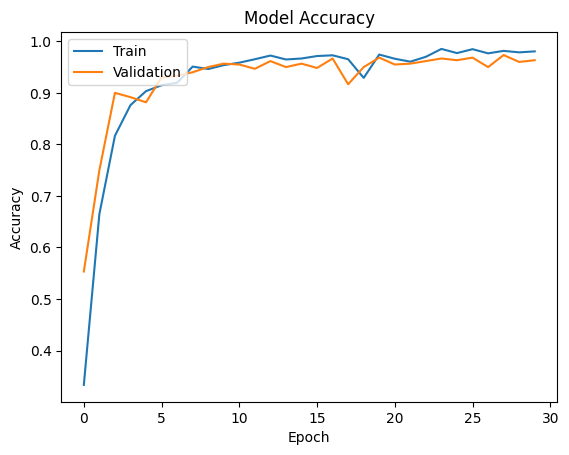

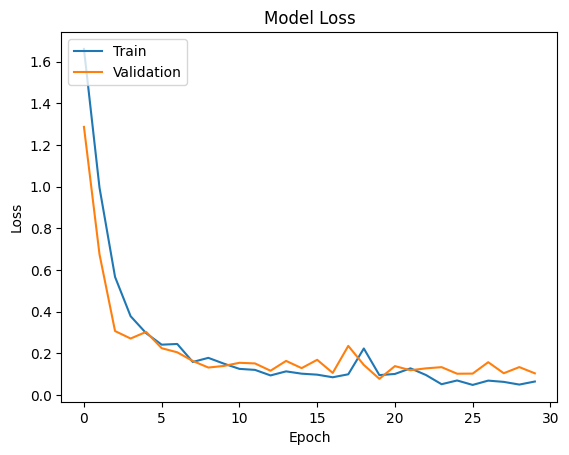

In [ ]:
#  plots for the above results

import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# prompt: download the above model in pkl

import pickle

# Assuming your model is named 'model'
# Save the model to a file
with open('/content/drive/MyDrive/model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from tensorflow.keras.models import save_model

# Assuming you have your trained model
model.save('/content/drive/MyDrive/models/model.h5')  # Save the model in the 'models' directory


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#**Testing using random data**





In [ ]:
# prompt: load the above saved model

import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/models/model.h5')

# Now you can use the 'model' object to make predictions
# For example:
# predictions = model.predict(some_input_data)

Selected Gesture: scroll_right
Selected Sequence: 2021-11-01-191402_7
Displaying the selected sequence:


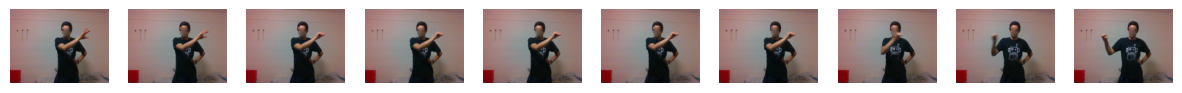

1/1 [==============================] - 1s 642ms/step
Predicted Gesture: scroll_right


In [ ]:
import numpy as np
import random
import tensorflow as tf
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd

# Paths to the dataset and model
dataset_path = "/content/drive/MyDrive/rgb_blur"
model_path = "/content/drive/MyDrive/models/model.h5"
class_names = ['scroll_down', 'scroll_left', 'scroll_right', 'scroll_up', 'zoom_in', 'zoom_out']

# Parameters
num_frames_per_sequence = 10
frame_height = 120
frame_width = 160
color_channels = 3

# Load the pretrained model
model = load_model(model_path)

# Load the InceptionV3 model for feature extraction
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(frame_height, frame_width, color_channels))
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Function to preprocess, extract features, and visualize sequence frames
def preprocess_extract_and_visualize(sequence_path):
    selected_frames_indices = list(range(0, 40, 4))[:num_frames_per_sequence]  # Select every 4th frame
    sequence_frames = []

    for frame_index in selected_frames_indices:
        frame_file = f'{frame_index}.png'
        frame_path = f"{sequence_path}/{frame_file}"
        if tf.io.gfile.exists(frame_path):
            img = tf.keras.preprocessing.image.load_img(frame_path, target_size=(frame_height, frame_width))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            sequence_frames.append(img_array)
        else:
            print(f"Frame not found: {frame_path}")

    if len(sequence_frames) == num_frames_per_sequence:
        # Visualize the frames
        print("Displaying the selected sequence:")
        plt.figure(figsize=(15, 5))
        for i, frame in enumerate(sequence_frames):
            plt.subplot(1, num_frames_per_sequence, i + 1)
            plt.imshow(frame.astype("uint8"))
            plt.axis('off')
        plt.show()

        # Preprocess and extract features
        sequence_frames = preprocess_input(np.array(sequence_frames))
        features = []
        for img in sequence_frames:
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            feature = feature_extractor.predict(img)
            features.append(feature.flatten())
        return np.array(features)
    else:
        return None

# Select a random gesture and sequence
random_gesture = random.choice(class_names)
gesture_path = f"{dataset_path}/{random_gesture}"
sequence_files = tf.io.gfile.listdir(gesture_path)
random_sequence = random.choice(sequence_files)
sequence_path = f"{gesture_path}/{random_sequence}"

print(f"Selected Gesture: {random_gesture}")
print(f"Selected Sequence: {random_sequence}")

# Preprocess, extract features, and visualize the sequence
features = preprocess_extract_and_visualize(sequence_path)
if features is not None:
    features = np.expand_dims(features, axis=0)  # Add batch dimension

    # Test the model
    predicted_probs = model.predict(features)
    predicted_label = np.argmax(predicted_probs, axis=1)[0]

    print(f"Predicted Gesture: {class_names[predicted_label]}")
else:
    print("Failed to preprocess or extract features for the selected sequence.")


Available gestures: ['scroll_down', 'scroll_left', 'scroll_right', 'scroll_up', 'zoom_in', 'zoom_out']
Enter the gesture name: scroll_up
Selected Gesture: scroll_up
Selected Sequence: 2021-10-29-185842_39
Displaying the selected sequence:


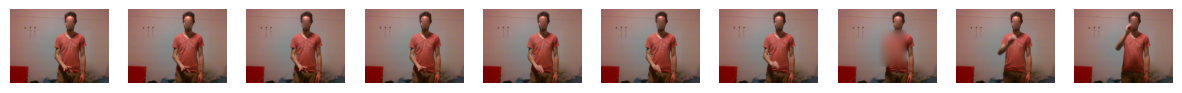

1/1 [==============================] - 1s 631ms/step
Predicted Gesture: scroll_up


In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt

# Paths to the dataset and model
dataset_path = "/content/drive/MyDrive/rgb_blur"
model_path = "/content/drive/MyDrive/models/model.h5"
class_names = ['scroll_down', 'scroll_left', 'scroll_right', 'scroll_up', 'zoom_in', 'zoom_out']

# Parameters
num_frames_per_sequence = 10
frame_height = 120
frame_width = 160
color_channels = 3

# Load the pretrained model
model = load_model(model_path)

# Load the InceptionV3 model for feature extraction
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(frame_height, frame_width, color_channels))
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Function to preprocess, extract features, and visualize sequence frames
def preprocess_extract_and_visualize(sequence_path):
    selected_frames_indices = list(range(0, 40, 4))[:num_frames_per_sequence]  # Select every 4th frame
    sequence_frames = []

    for frame_index in selected_frames_indices:
        frame_file = f'{frame_index}.png'
        frame_path = f"{sequence_path}/{frame_file}"
        if tf.io.gfile.exists(frame_path):
            img = tf.keras.preprocessing.image.load_img(frame_path, target_size=(frame_height, frame_width))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            sequence_frames.append(img_array)
        else:
            print(f"Frame not found: {frame_path}")

    if len(sequence_frames) == num_frames_per_sequence:
        # Visualize the frames
        print("Displaying the selected sequence:")
        plt.figure(figsize=(15, 5))
        for i, frame in enumerate(sequence_frames):
            plt.subplot(1, num_frames_per_sequence, i + 1)
            plt.imshow(frame.astype("uint8"))
            plt.axis('off')
        plt.show()

        # Preprocess and extract features
        sequence_frames = preprocess_input(np.array(sequence_frames))
        features = []
        for img in sequence_frames:
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            feature = feature_extractor.predict(img)
            features.append(feature.flatten())
        return np.array(features)
    else:
        return None

# Prompt the user for a gesture name
print("Available gestures:", class_names)
gesture_name = input("Enter the gesture name: ").strip()
if gesture_name not in class_names:
    raise ValueError(f"Invalid gesture name. Please choose from {class_names}.")

gesture_path = f"{dataset_path}/{gesture_name}"
sequence_files = tf.io.gfile.listdir(gesture_path)
random_sequence = np.random.choice(sequence_files)
sequence_path = f"{gesture_path}/{random_sequence}"

print(f"Selected Gesture: {gesture_name}")
print(f"Selected Sequence: {random_sequence}")

# Preprocess, extract features, and visualize the sequence
features = preprocess_extract_and_visualize(sequence_path)
if features is not None:
    features = np.expand_dims(features, axis=0)  # Add batch dimension

    # Test the model
    predicted_probs = model.predict(features)
    predicted_label = np.argmax(predicted_probs, axis=1)[0]

    print(f"Predicted Gesture: {class_names[predicted_label]}")
else:
    print("Failed to preprocess or extract features for the selected sequence.")


# **4.K-Cross validation CNN-RNN**

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(train_data['label'])
y_val = lb.transform(val_data['label'])
y_test = lb.transform(test_data['label'])

# Define the function to build the model
def build_hybrid_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(LSTM(32))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(6, activation='softmax'))

    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Assuming you have already split the data into features and labels
# X_train_features, y_train - Replace these with your actual data

input_shape = (X_train_features.shape[1], X_train_features.shape[2])
kf = KFold(n_splits=5)

# Lists to store the results
train_accuracy_list = []
train_loss_list = []
val_accuracy_list = []
val_loss_list = []
test_accuracy_list = []
test_loss_list = []

# Implementing k-fold cross-validation
for train_index, val_index in kf.split(X_train_features):
    X_train_fold, X_val_fold = X_train_features[train_index], X_train_features[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = build_hybrid_model(input_shape)

    # Callbacks for early stopping and reducing learning rate
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=100,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate on the training set
    train_loss, train_accuracy = model.evaluate(X_train_fold, y_train_fold, verbose=0)
    train_accuracy_list.append(train_accuracy)
    train_loss_list.append(train_loss)

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_accuracy_list.append(val_accuracy)
    val_loss_list.append(val_loss)

    # Evaluate on the test set
    test_loss, test_accuracy = model.evaluate(X_test_features, y_test, verbose=0)
    test_accuracy_list.append(test_accuracy)
    test_loss_list.append(test_loss)

# Output the results
print(f"Training accuracies for each fold: {train_accuracy_list}")
print(f"Training losses for each fold: {train_loss_list}")
print(f"Validation accuracies for each fold: {val_accuracy_list}")
print(f"Validation losses for each fold: {val_loss_list}")
print(f"Test accuracies for each fold: {test_accuracy_list}")
print(f"Test losses for each fold: {test_loss_list}")

print(f"Average training accuracy: {sum(train_accuracy_list) / len(train_accuracy_list)}")
print(f"Average training loss: {sum(train_loss_list) / len(train_loss_list)}")
print(f"Average validation accuracy: {sum(val_accuracy_list) / len(val_accuracy_list)}")
print(f"Average validation loss: {sum(val_loss_list) / len(val_loss_list)}")
print(f"Average test accuracy: {sum(test_accuracy_list) / len(test_accuracy_list)}")
print(f"Average test loss: {sum(test_loss_list) / len(test_loss_list)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.2091 - loss: 2.6058 - val_accuracy: 0.3476 - val_loss: 1.6467 - learning_rate: 1.0000e-04
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.3520 - loss: 1.8584 - val_accuracy: 0.4905 - val_loss: 1.4690 - learning_rate: 1.0000e-04
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4398 - loss: 1.5661 - val_accuracy: 0.5833 - val_loss: 1.2567 - learning_rate: 1.0000e-04
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4858 - loss: 1.3824 - val_accuracy: 0.6881 - val_loss: 1.0314 - learning_rate: 1.0000e-04
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5849 - loss: 1.1306 - val_accuracy: 0.7524 - val_loss: 0.8790 - learning_rate: 1.0000e-04
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6075 - loss: 1.0603 - val_accuracy: 0.7738 - val_loss: 0.7582 - learning_rate: 1.0000e-04
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 

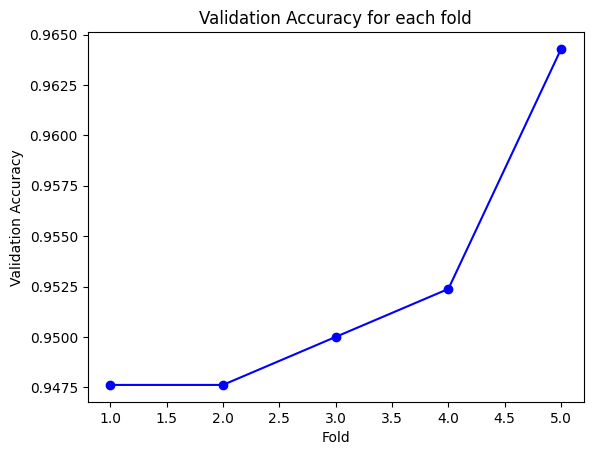

In [ ]:
# prompt: plot the above results

import matplotlib.pyplot as plt

# Plot the validation accuracy for each fold
plt.plot(range(1, len(val_accuracy_list) + 1), val_accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy for each fold')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.show()




10/10 [==============================] - 0s 7ms/step


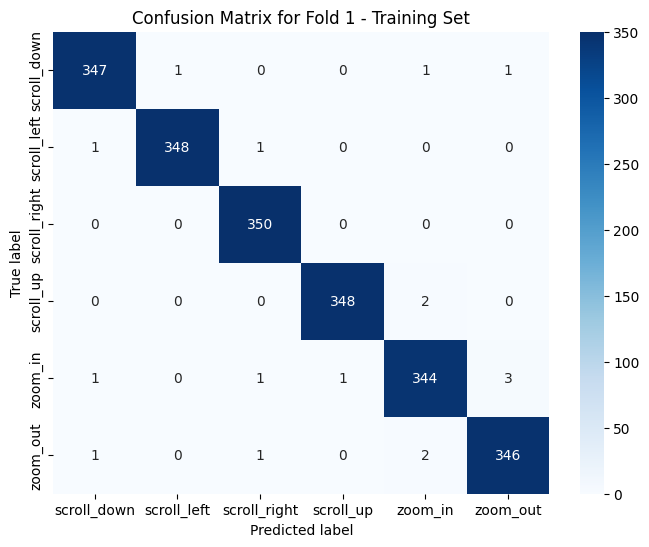

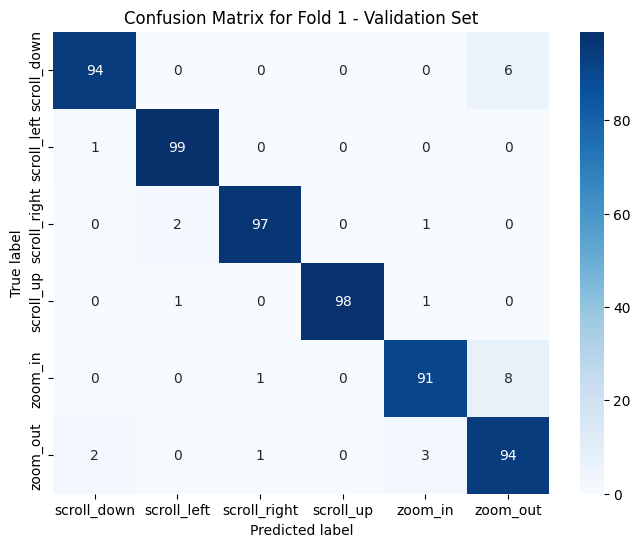

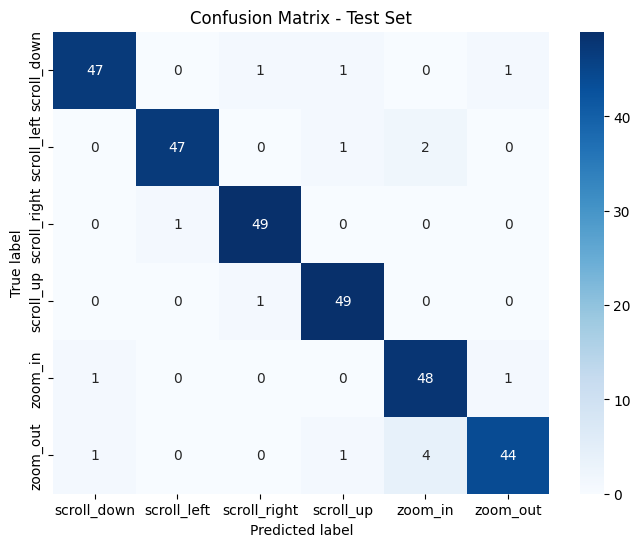

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Predictions for confusion matrix
y_train_pred = model.predict(X_train_features)
y_val_pred = model.predict(X_val_features)
y_test_pred = model.predict(X_test_features)

# Convert one-hot encoded predictions back to class indices
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Convert one-hot encoded true labels back to class indices
y_train_true_classes = np.argmax(y_train, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrices
train_cm = confusion_matrix(y_train_true_classes, y_train_pred_classes)
val_cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)
test_cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Plot confusion matrices
plot_confusion_matrix(train_cm, classes=class_names, title='Confusion Matrix for Fold 1 - Training Set')
plot_confusion_matrix(val_cm, classes=class_names, title='Confusion Matrix for Fold 1 - Validation Set')
plot_confusion_matrix(test_cm, classes=class_names, title='Confusion Matrix for Fold 1- Test Set')


# **5.Inception-GRU model**

Training on fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.2754 - loss: 1.8185 - val_accuracy: 0.6944 - val_loss: 1.0135 - learning_rate: 0.0010
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5756 - loss: 1.1792 - val_accuracy: 0.7907 - val_loss: 0.5940 - learning_rate: 0.0010
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.7516 - loss: 0.7240 - val_accuracy: 0.8093 - val_loss: 0.5340 - learning_rate: 0.0010
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.7848 - loss: 0.6131 - val_accuracy: 0.8981 - val_loss: 0.3135 - learning_rate: 0.0010
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8755 - loss: 0.3924 - val_accuracy: 0.9037 - val_loss: 0.2591 - learning_rate: 0.0010
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 113ms/step - accuracy: 0.9106 - loss: 0.2835 - val_accuracy: 0.8944 - val_loss: 0.2518 - learning_rate: 0.0010
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9175 - loss: 0.

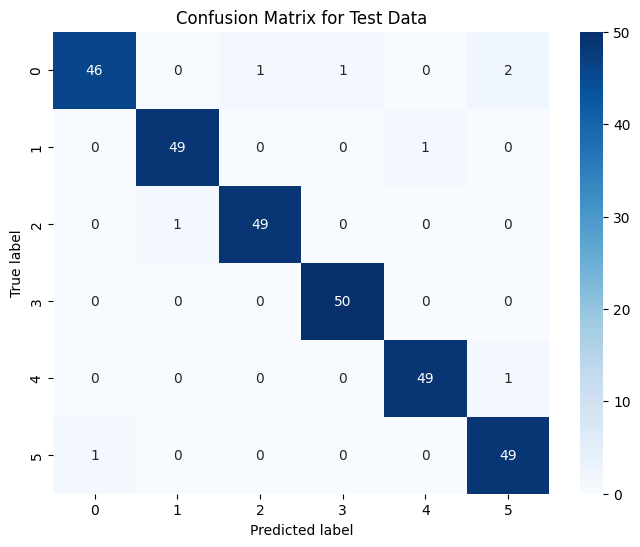

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the features
train_features_path = "/content/drive/MyDrive/X_train_features.npy"
val_features_path = "/content/drive/MyDrive/X_val_features.npy"
test_features_path = "/content/drive/MyDrive/X_test_features.npy"

X_train_features = np.load(train_features_path)
X_val_features = np.load(val_features_path)
X_test_features = np.load(test_features_path)

# Concatenate train and val features for K-Fold Cross Validation
X_combined_features = np.concatenate((X_train_features, X_val_features), axis=0)
y_combined = np.concatenate((train_data['label'].values, val_data['label'].values), axis=0)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_combined_one_hot = lb.fit_transform(y_combined)
y_test_one_hot = lb.transform(test_data['label'])

# Define the Inception-GRU model
def build_inception_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))  # Assuming 6 classes
    return model

# Input shape for the GRU model
input_shape = (X_combined_features.shape[1], X_combined_features.shape[2])  # (10, 2048)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
test_accuracies = []

for train_index, val_index in kf.split(X_combined_features):
    print(f"Training on fold {fold}...")

    # Split data into train and validation sets for the current fold
    X_train, X_val = X_combined_features[train_index], X_combined_features[val_index]
    y_train, y_val = y_combined_one_hot[train_index], y_combined_one_hot[val_index]

    # Build the model
    model = build_inception_gru_model(input_shape)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(X_test_features, y_test_one_hot)
    print(f"Fold {fold} - Test Accuracy: {test_accuracy:.4f}")
    test_accuracies.append(test_accuracy)
    fold += 1

# Print the average test accuracy across all folds
average_test_accuracy = np.mean(test_accuracies)
print(f"Average Test Accuracy across all folds: {average_test_accuracy:.4f}")

# Generate confusion matrix for test data using the last trained model
y_test_pred = model.predict(X_test_features)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

test_cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix for test data
class_names = lb.classes_
plot_confusion_matrix(test_cm, classes=class_names, title='Confusion Matrix for Test Data')


# **6.Xception-LSTM model**

In [ ]:
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer

# Load Xception base model without the top layer for feature extraction
xception_base = Xception(weights='imagenet', include_top=False, pooling='avg')

# Function to extract features using Xception
def extract_xception_features(frames):
    frames = np.array(frames)
    frames = frames.reshape(-1, frames.shape[-3], frames.shape[-2], frames.shape[-1])  # Reshape for Xception
    features = xception_base.predict(frames, batch_size=32)
    return features.reshape(-1, 10, features.shape[-1])  # Reshape to sequences

# Define the Xception-LSTM model architecture
def build_xception_lstm_model(n_timesteps, n_features, n_outputs):
    inputs = Input(shape=(n_timesteps, n_features))
    x = LSTM(128, return_sequences=True)(inputs)
    x = LSTM(64)(x)
    outputs = Dense(n_outputs, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# One-hot encoding labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(train_data['label'])  # Assuming 'train_data' contains all data
X_features = extract_xception_features(train_data)  # Feature extraction for entire dataset
X_test_features_xception = extract_xception_features(test_data)  # Features for test set
y_test_encoded = lb.transform(test_data['label'])  # Encode test labels

# Prepare KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
n_timesteps = X_features.shape[1]
n_features = X_features.shape[2]
n_outputs = y_encoded.shape[1]

fold_accuracies = []

# Perform 5-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_features)):
    print(f"Training on Fold {fold + 1}...")

    # Split data into training and validation for the current fold
    X_train_fold, X_val_fold = X_features[train_idx], X_features[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # Build and train the model for the current fold
    model = build_xception_lstm_model(n_timesteps, n_features, n_outputs)
    model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=50, batch_size=32)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test_features_xception, y_test_encoded)
    print(f"Fold {fold + 1} Test Accuracy: {test_acc:.2f}")

    fold_accuracies.append(test_acc)

# Print average test accuracy across all folds
average_accuracy = np.mean(fold_accuracies)
print(f"Average Test Accuracy across 5 folds: {average_accuracy:.2f}")


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


IndexError: tuple index out of range

# **7. Xception-GRU model**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Function to build the Xception-GRU model
def build_xception_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))  # Assuming 6 classes
    return model

# Using the extracted features (e.g., X_train_features_xception, X_val_features_xception, X_test_features_xception)
input_shape_xception_gru = (X_train_features_xception.shape[1], X_train_features_xception.shape[2])  # (n_timesteps, n_features)

# Build the model
model_xception_gru = build_xception_gru_model(input_shape_xception_gru)

# Compile the model
model_xception_gru.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_xception_gru.summary()

# Early stopping callback (optional)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_xception_gru = model_xception_gru.fit(
    X_train_features_xception, y_train,
    validation_data=(X_val_features_xception, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss_xception_gru, test_accuracy_xception_gru = model_xception_gru.evaluate(X_test_features_xception, y_test)
print(f"Test Accuracy: {test_accuracy_xception_gru:.4f}")


NameError: name 'X_train_features_xception' is not defined

In [ ]:
!pip show tensorflow
!pip show keras


Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
!python --version


Python 3.10.12
